#Introduction
Traffic congestion is rising in cities around the world. Contributing factors include expanding urban populations, aging infrastructure, inefficient and uncoordinated traffic signal timing and a lack of real-time data.

In [8]:
import pandas as pd # Import pandas
import numpy as np # Import numpy
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import datetime # Import datetime
import warnings # Import warnings to filter out warnings
from sklearn.pipeline import Pipeline # Import Pipeline

In [9]:
warnings.filterwarnings('ignore')  # Filtering out warnings

#Dataset Description
This dataset contains 48.1k (48120) observations of the number of vehicles each hour in four different junctions:

####DateTime
####Juction
####Vehicles
####ID
The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. Some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections.

In [10]:
df = pd.read_csv('traffic.csv') # Reading traffic.csv file
df

DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]

#Data Preprocessing
It is important to clean the data and remove any outliers before conducting any analysis. Preprocessing steps involved in this project are:

####1.Dropping unnecessary columns
####2.Converting date and time to datetime format
####3.Creating new columns for day of the week, date, month, year, hour.

In [11]:
df.drop(['ID'], axis=1, inplace=True) # Drop ID column

In [12]:
df.describe() # Describe the data

Junction      Vehicles
count  48120.000000  48120.000000
mean       2.180549     22.791334
std        0.966955     20.750063
min        1.000000      1.000000
25%        1.000000      9.000000
50%        2.000000     15.000000
75%        3.000000     29.000000
max        4.000000    180.000000

In [13]:
df.info() # Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [14]:
df.head() # First 5 rows of the data after dropping ID

DateTime  Junction  Vehicles
0  2015-11-01 00:00:00         1        15
1  2015-11-01 01:00:00         1        13
2  2015-11-01 02:00:00         1        10
3  2015-11-01 03:00:00         1         7
4  2015-11-01 04:00:00         1         9

In [15]:
df['DateTime'] = pd.to_datetime(df['DateTime']) # Converting DateTime column to da

In [16]:
df.info() # Changed the data type of DateTime column to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [17]:
df_new = df.copy() # Copying the dataframe into a new dataframe

In [18]:
df_new['Year'] = df_new['DateTime'].dt.year # Extracting year from DateTime column
df_new['Month'] = df_new['DateTime'].dt.month # Extracting month from DateTime column
df_new['Date'] = df_new['DateTime'].dt.day # Extracting date from DateTime column
df_new['Hour'] = df_new['DateTime'].dt.hour # Extracting hour from DateTime column
df_new['Day'] = df_new.DateTime.dt.strftime('%A') # Extracting day from DateTime column

In [20]:
# %w - Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.
df_new  # Showing the new dataframe with added columns Year, Month, Date, Hour, Day

DateTime  Junction  Vehicles  Year  Month  Date  Hour     Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0  Sunday
1     2015-11-01 01:00:00         1        13  2015     11     1     1  Sunday
2     2015-11-01 02:00:00         1        10  2015     11     1     2  Sunday
3     2015-11-01 03:00:00         1         7  2015     11     1     3  Sunday
4     2015-11-01 04:00:00         1         9  2015     11     1     4  Sunday
...                   ...       ...       ...   ...    ...   ...   ...     ...
48115 2017-06-30 19:00:00         4        11  2017      6    30    19  Friday
48116 2017-06-30 20:00:00         4        30  2017      6    30    20  Friday
48117 2017-06-30 21:00:00         4        16  2017      6    30    21  Friday
48118 2017-06-30 22:00:00         4        22  2017      6    30    22  Friday
48119 2017-06-30 23:00:00         4        12  2017      6    30    23  Friday

[48120 rows x 8 columns]

#Visualizing the Data
It is important to understand each and every aspect of the data before conducting any analysis. The following plots are used to visualize the data:

####1.Line plot of the Traffic Flow at Junctions 1, 2, 3 and 4 from starting date to the end date.
####2.Pairplot between the different features.
####3.Histogram of the traffic flow monthwise.
####4.Lineplots between number of vehicles and Year, Month, Date, Hour, Day for each of the four junctions.
####5.Countplot of increasing traffic over the years.
####6.Heatmap for correlations between the different features.

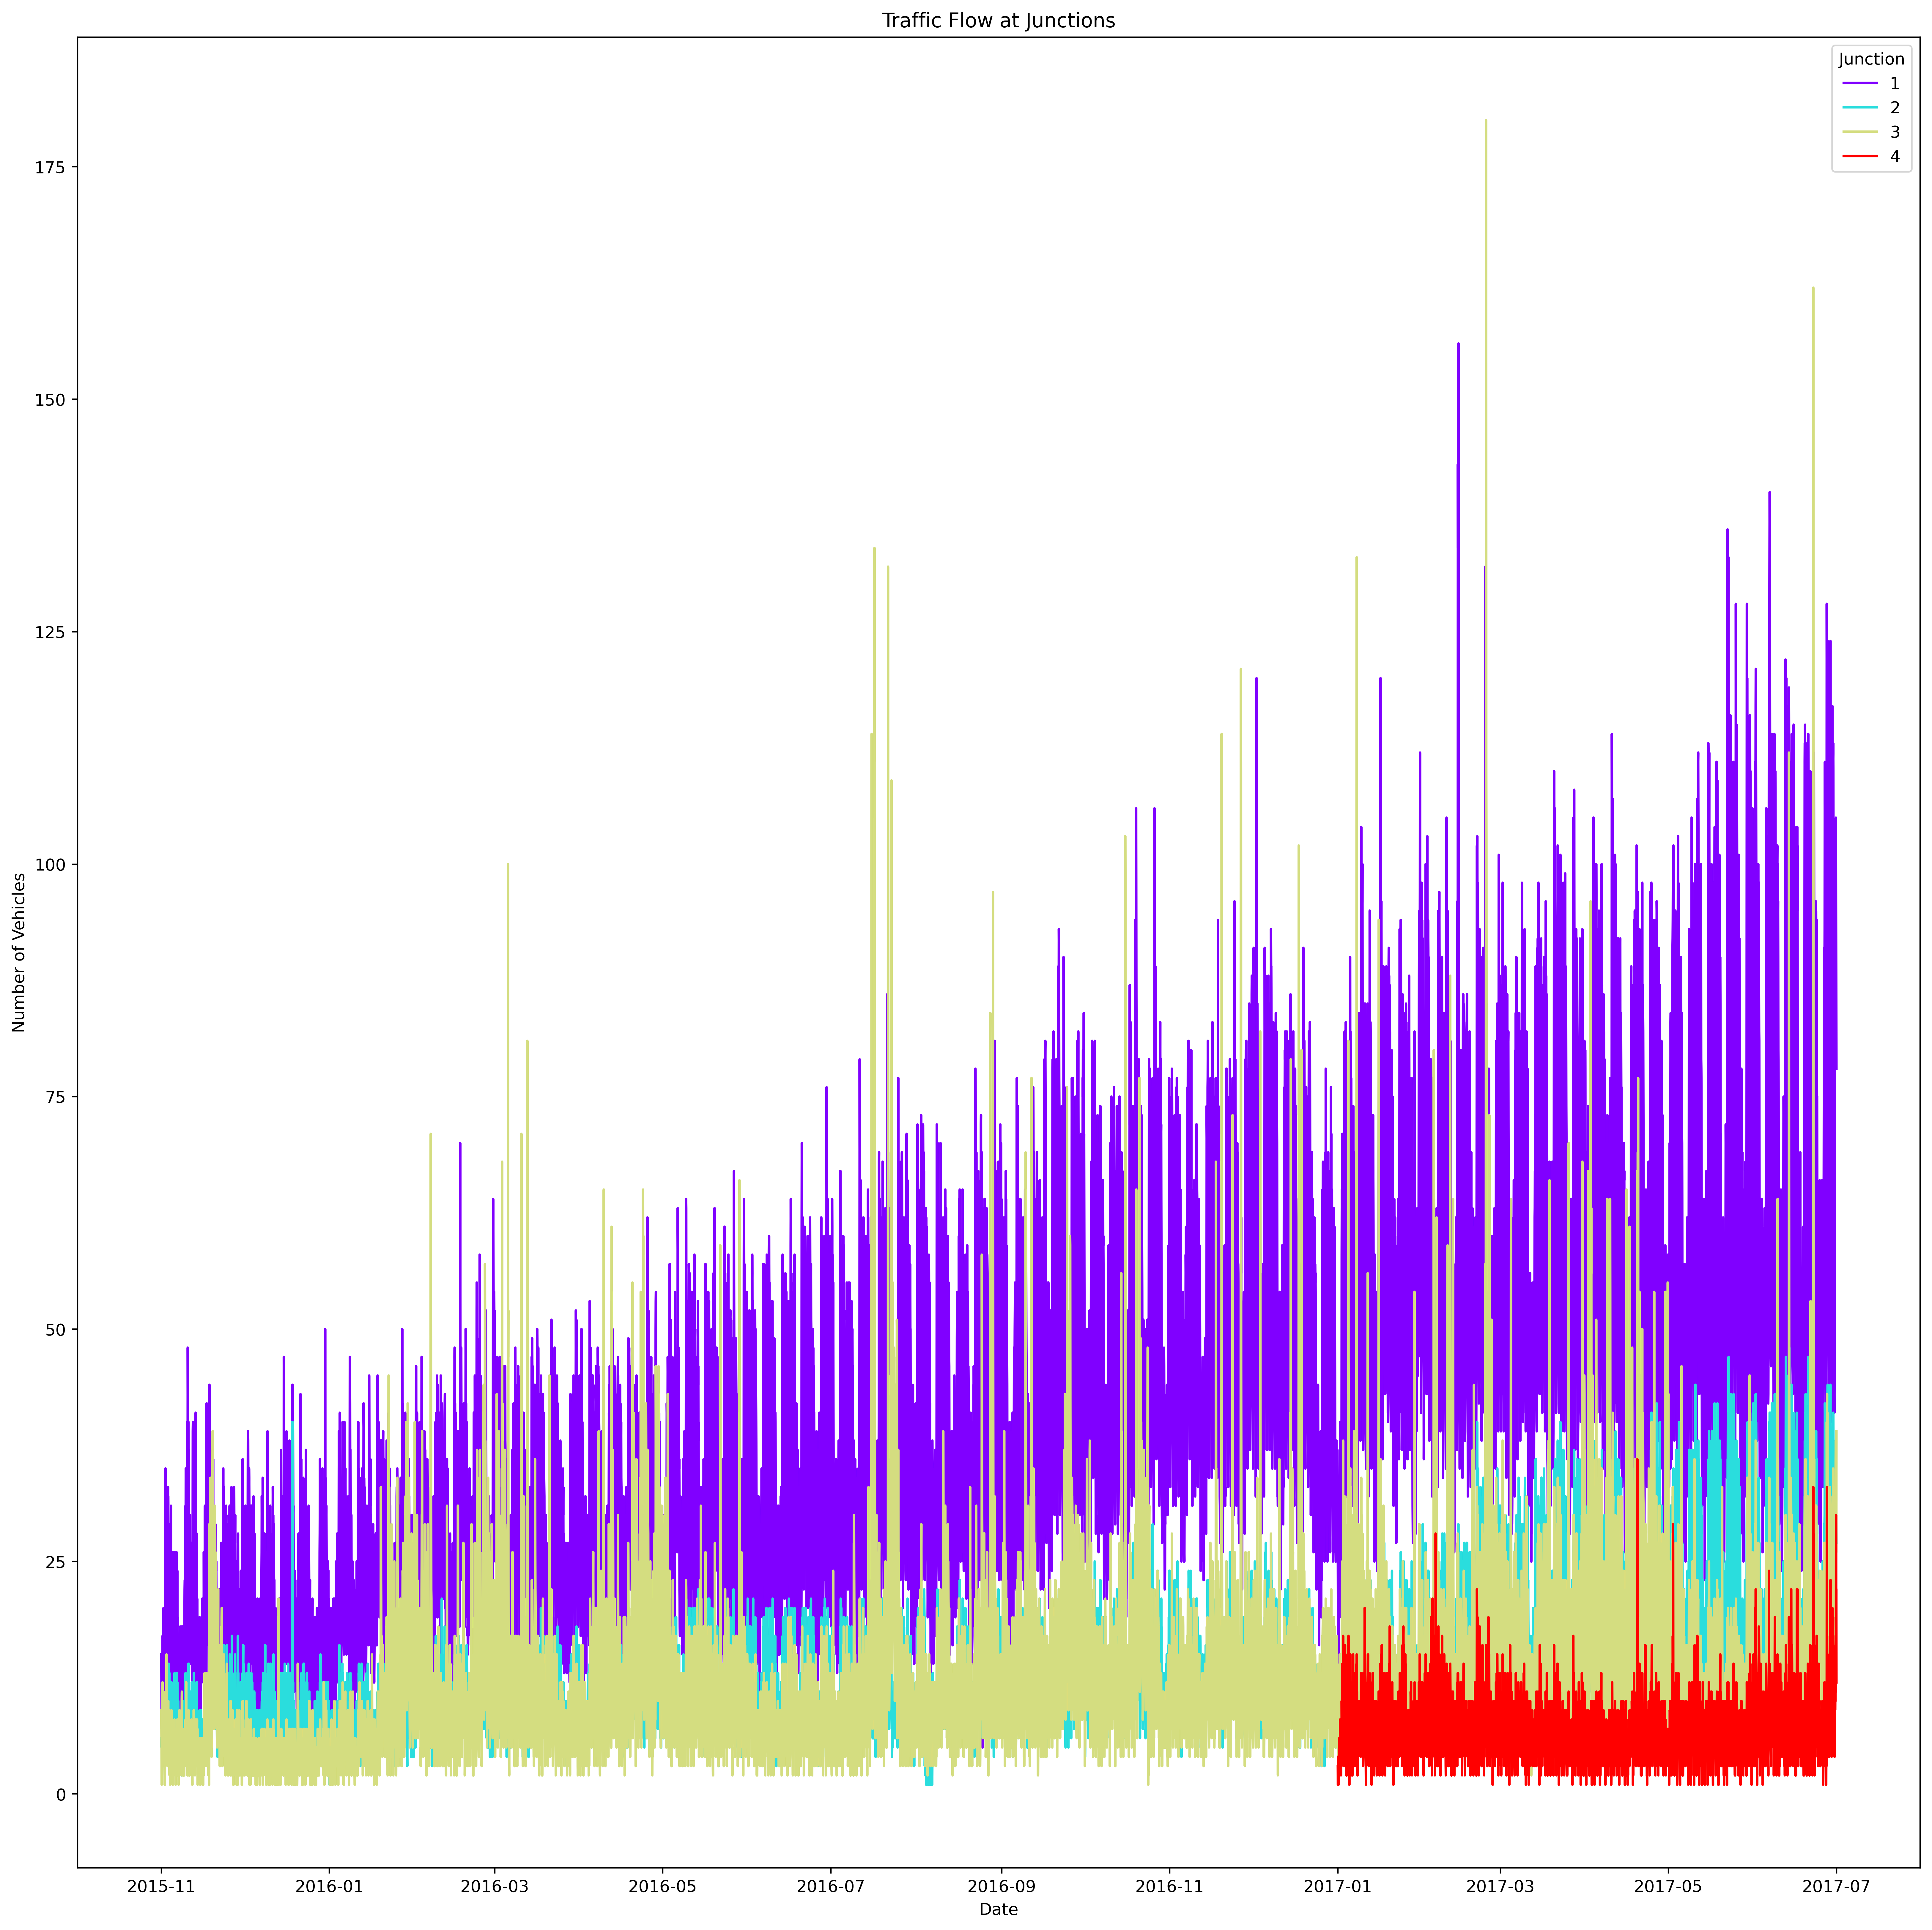

In [21]:
""" Line plot of the Traffic Flow at Junctions 1, 2, 3 and 4
    from starting date to the end date."""

plt.figure(figsize=(20, 20), dpi = 400) # Setting the size of the plot
plot = sns.lineplot(x = df['DateTime'], y = "Vehicles", data = df, hue="Junction", palette="rainbow") # Plotting the data
plot.set_title('Traffic Flow at Junctions') # Setting the title of the plot
plot.set_xlabel('Date') # Setting the x-axis label of the plot
plot.set_ylabel('Number of Vehicles') # Setting the y-axis label of the plot
plt.savefig('plots/traffic_flow.png') # Saving the plot
plt.show() # Showing the plot

<Figure size 8000x8000 with 0 Axes>

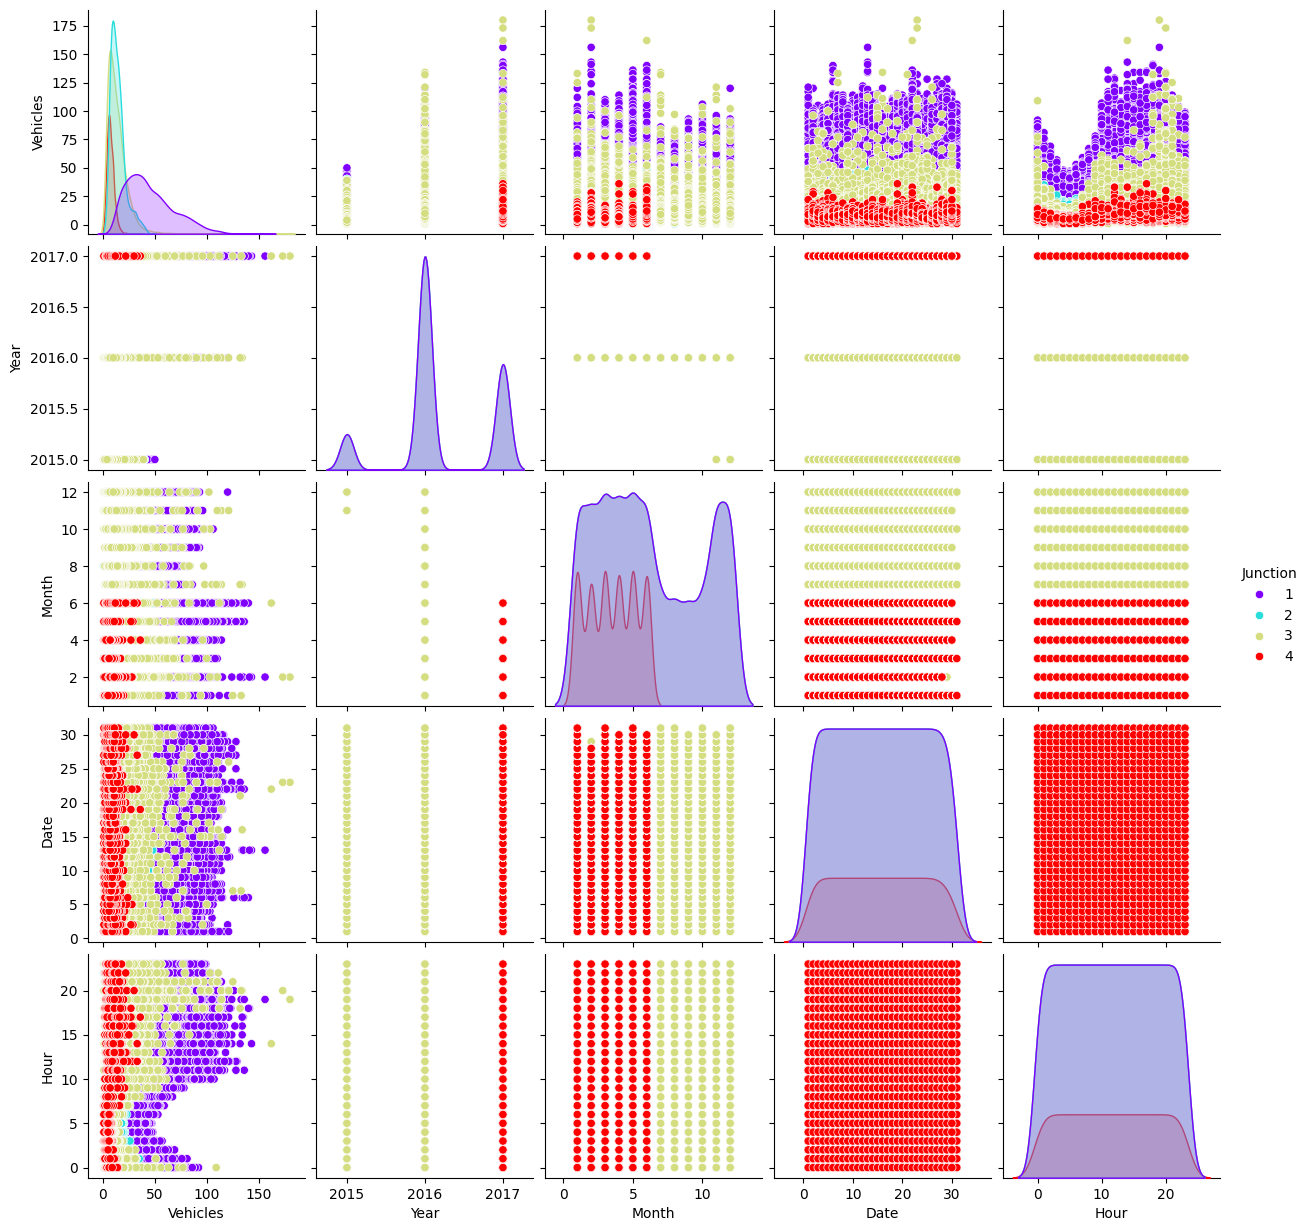

In [22]:
""" Pairplot between the different features. """

plt.figure(figsize=(20, 20), dpi = 400) # Setting the size of the plot
sns.pairplot(df_new, hue="Junction", palette="rainbow") # Plotting the data
plt.savefig('plots/traffic_flow_pairplot.png') # Saving the plot
plt.show() # Showing the plot

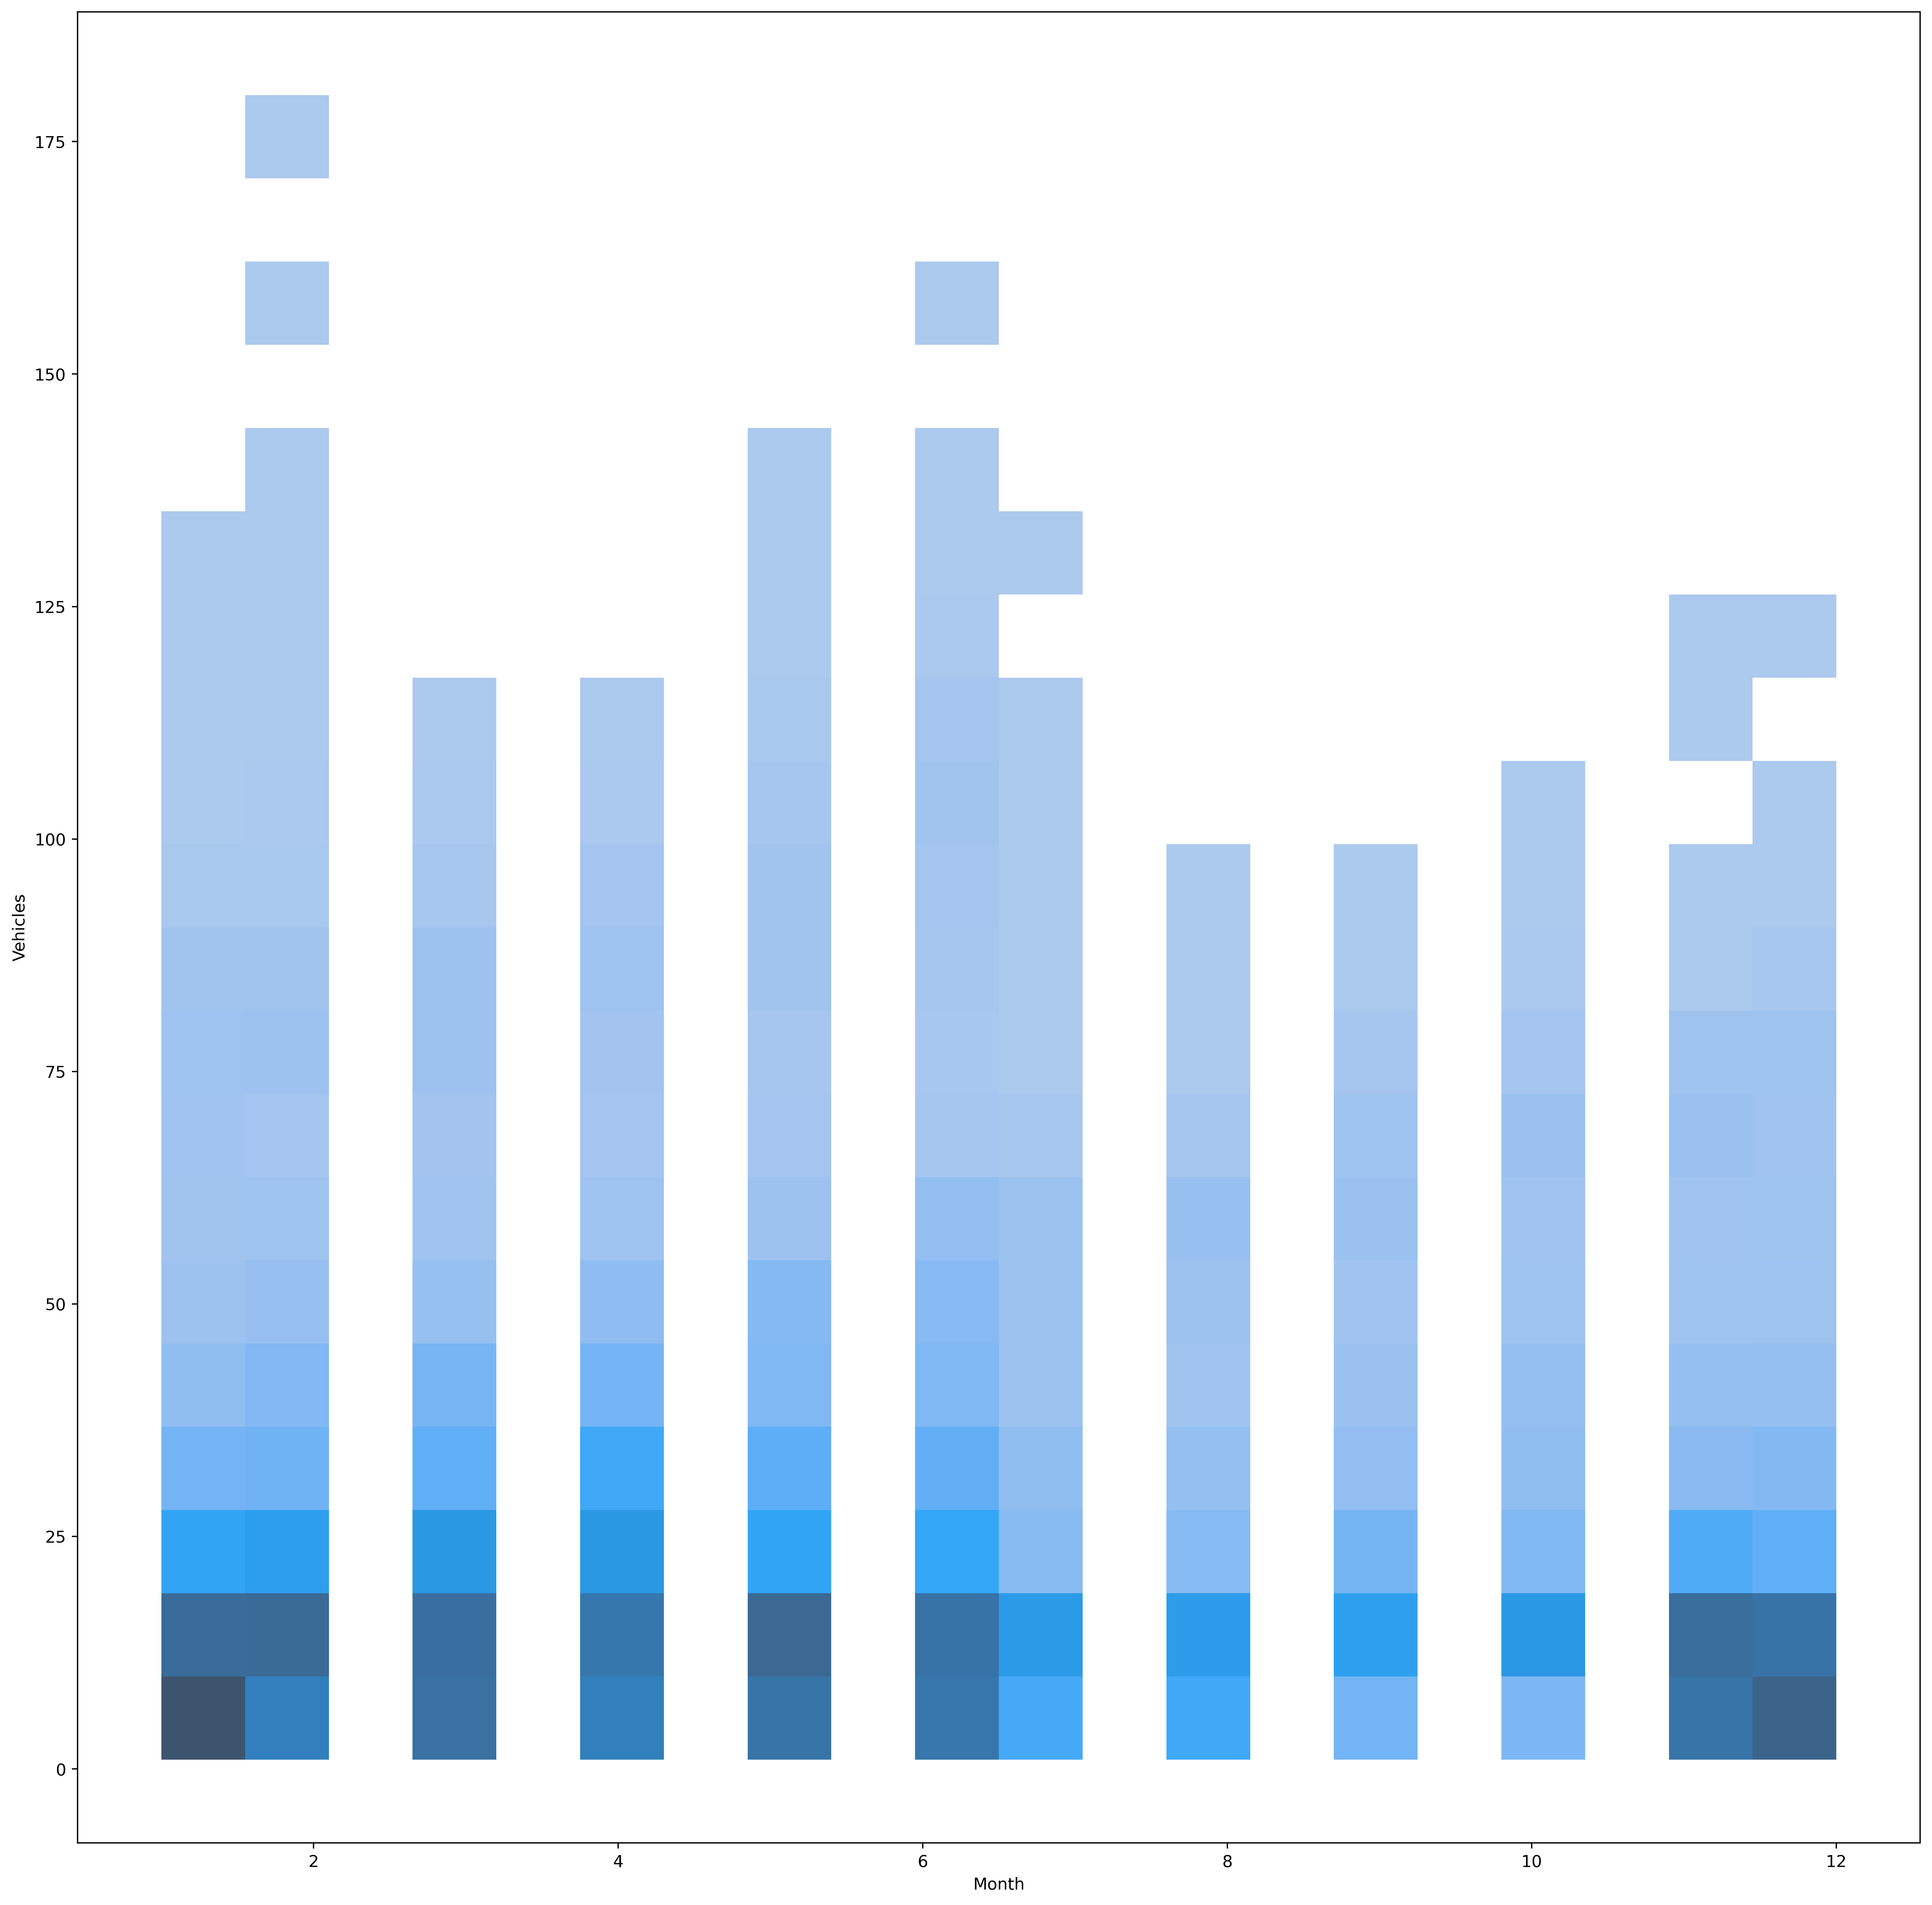

In [23]:
""" Histogram of the traffic flow monthwise. """

plt.figure(figsize=(20,20), dpi=400) # Setting the size of the plot
sns.histplot(x='Month', y='Vehicles', data=df_new, bins=20) # Plotting histogram of Monthwise Traffic
plt.savefig('plots/traffic_flow_monthwise.png') # Saving the plot
plt.show() # Showing the plot

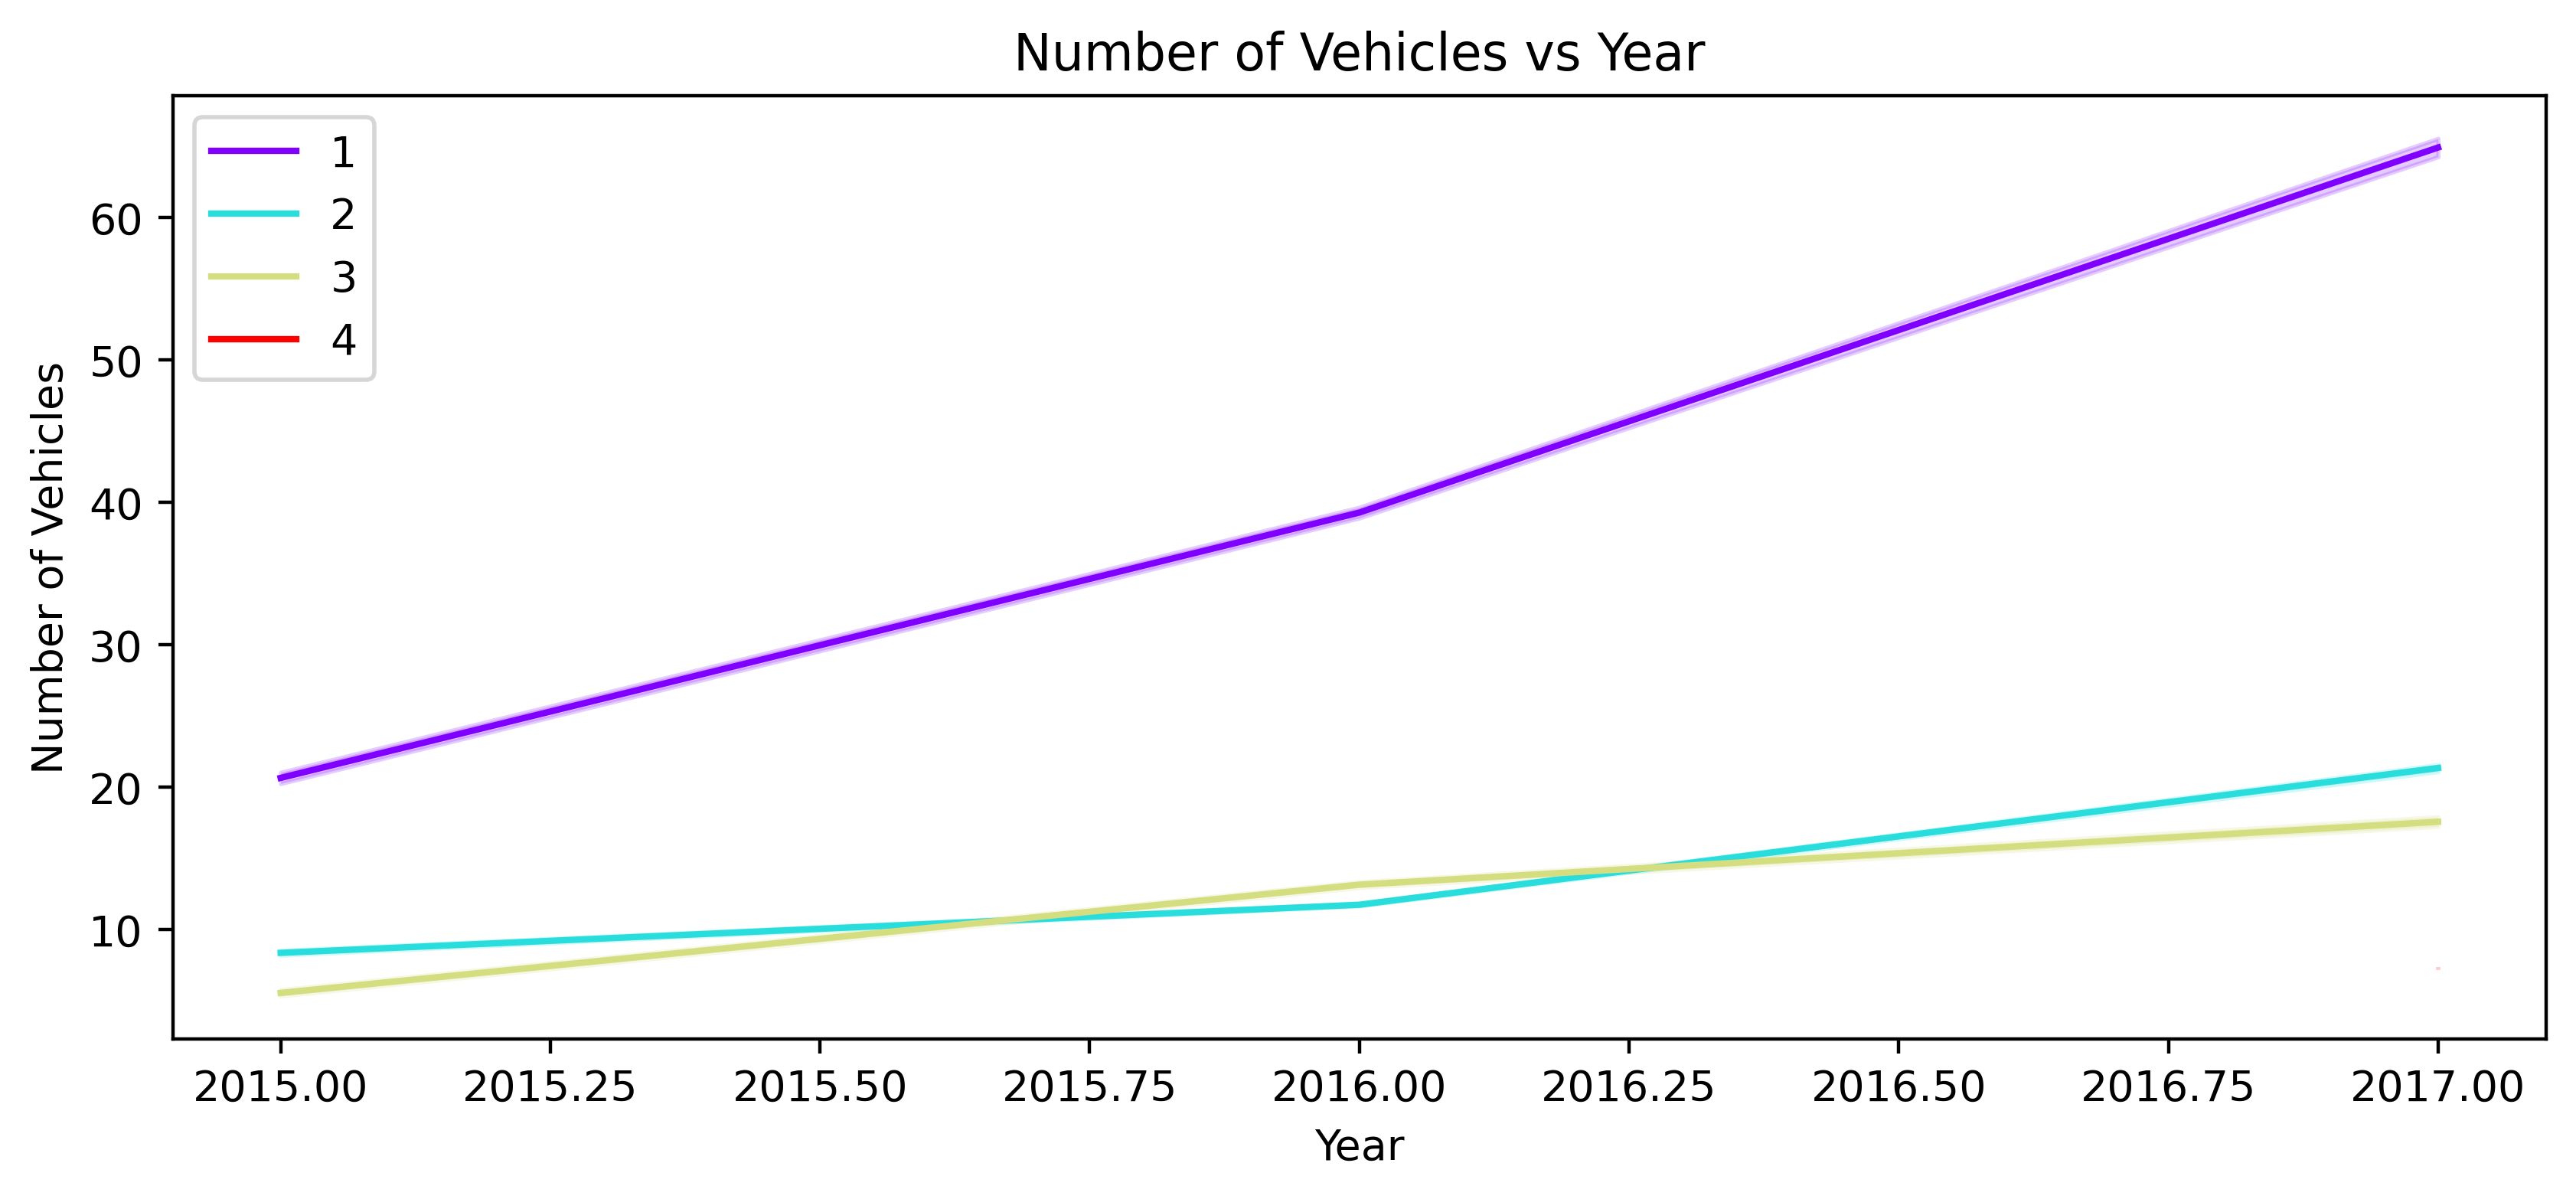

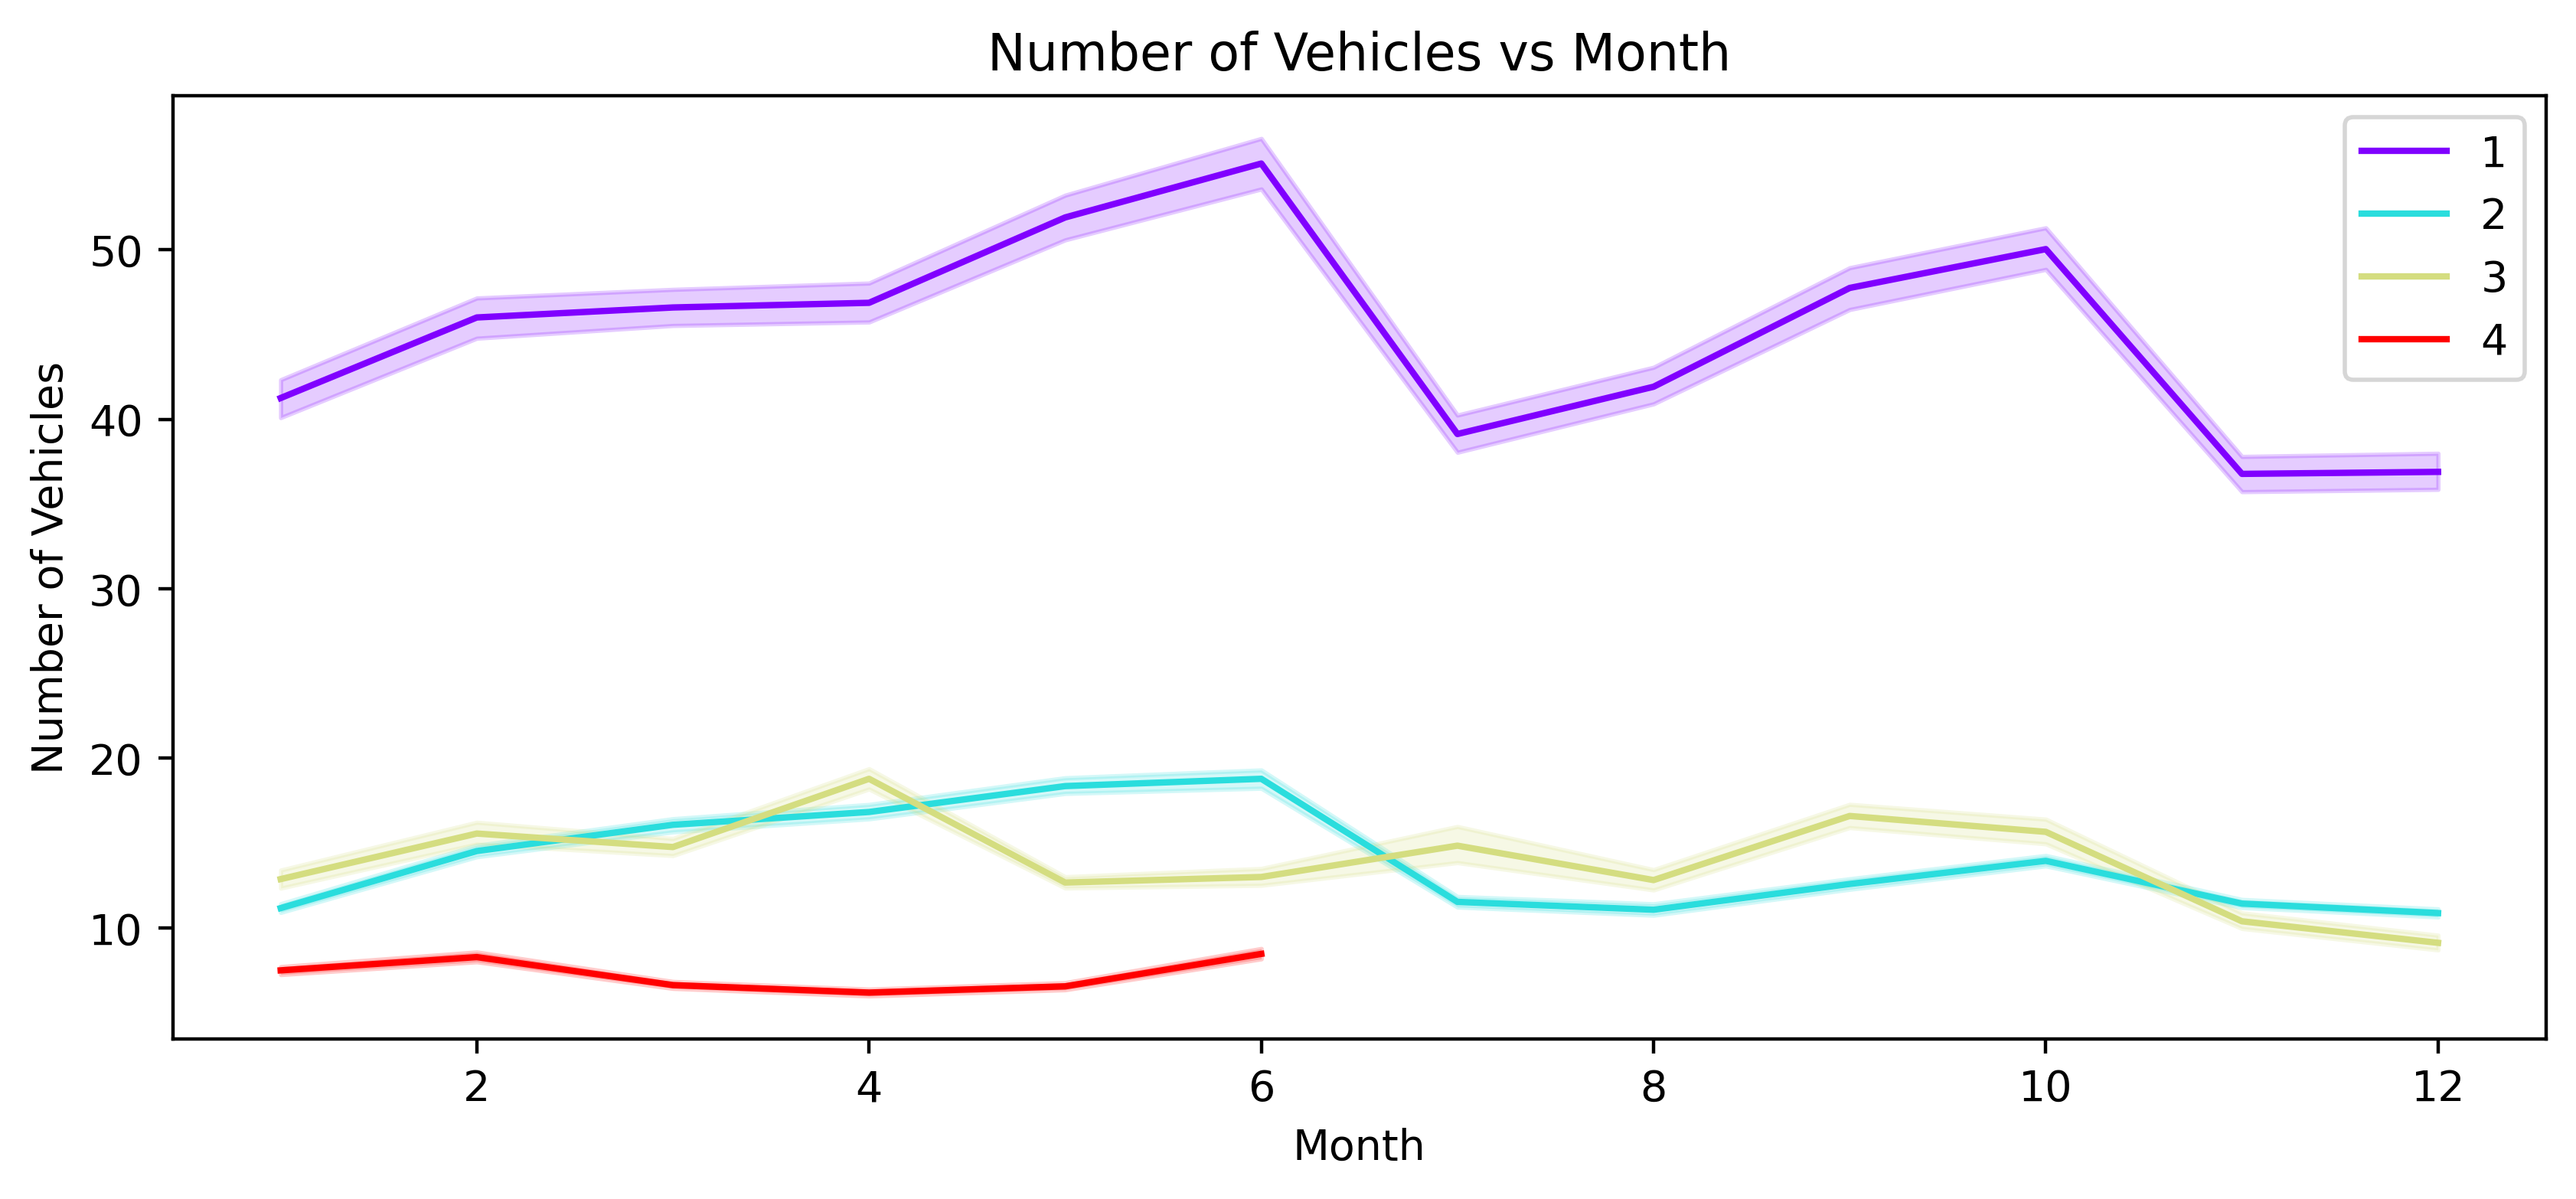

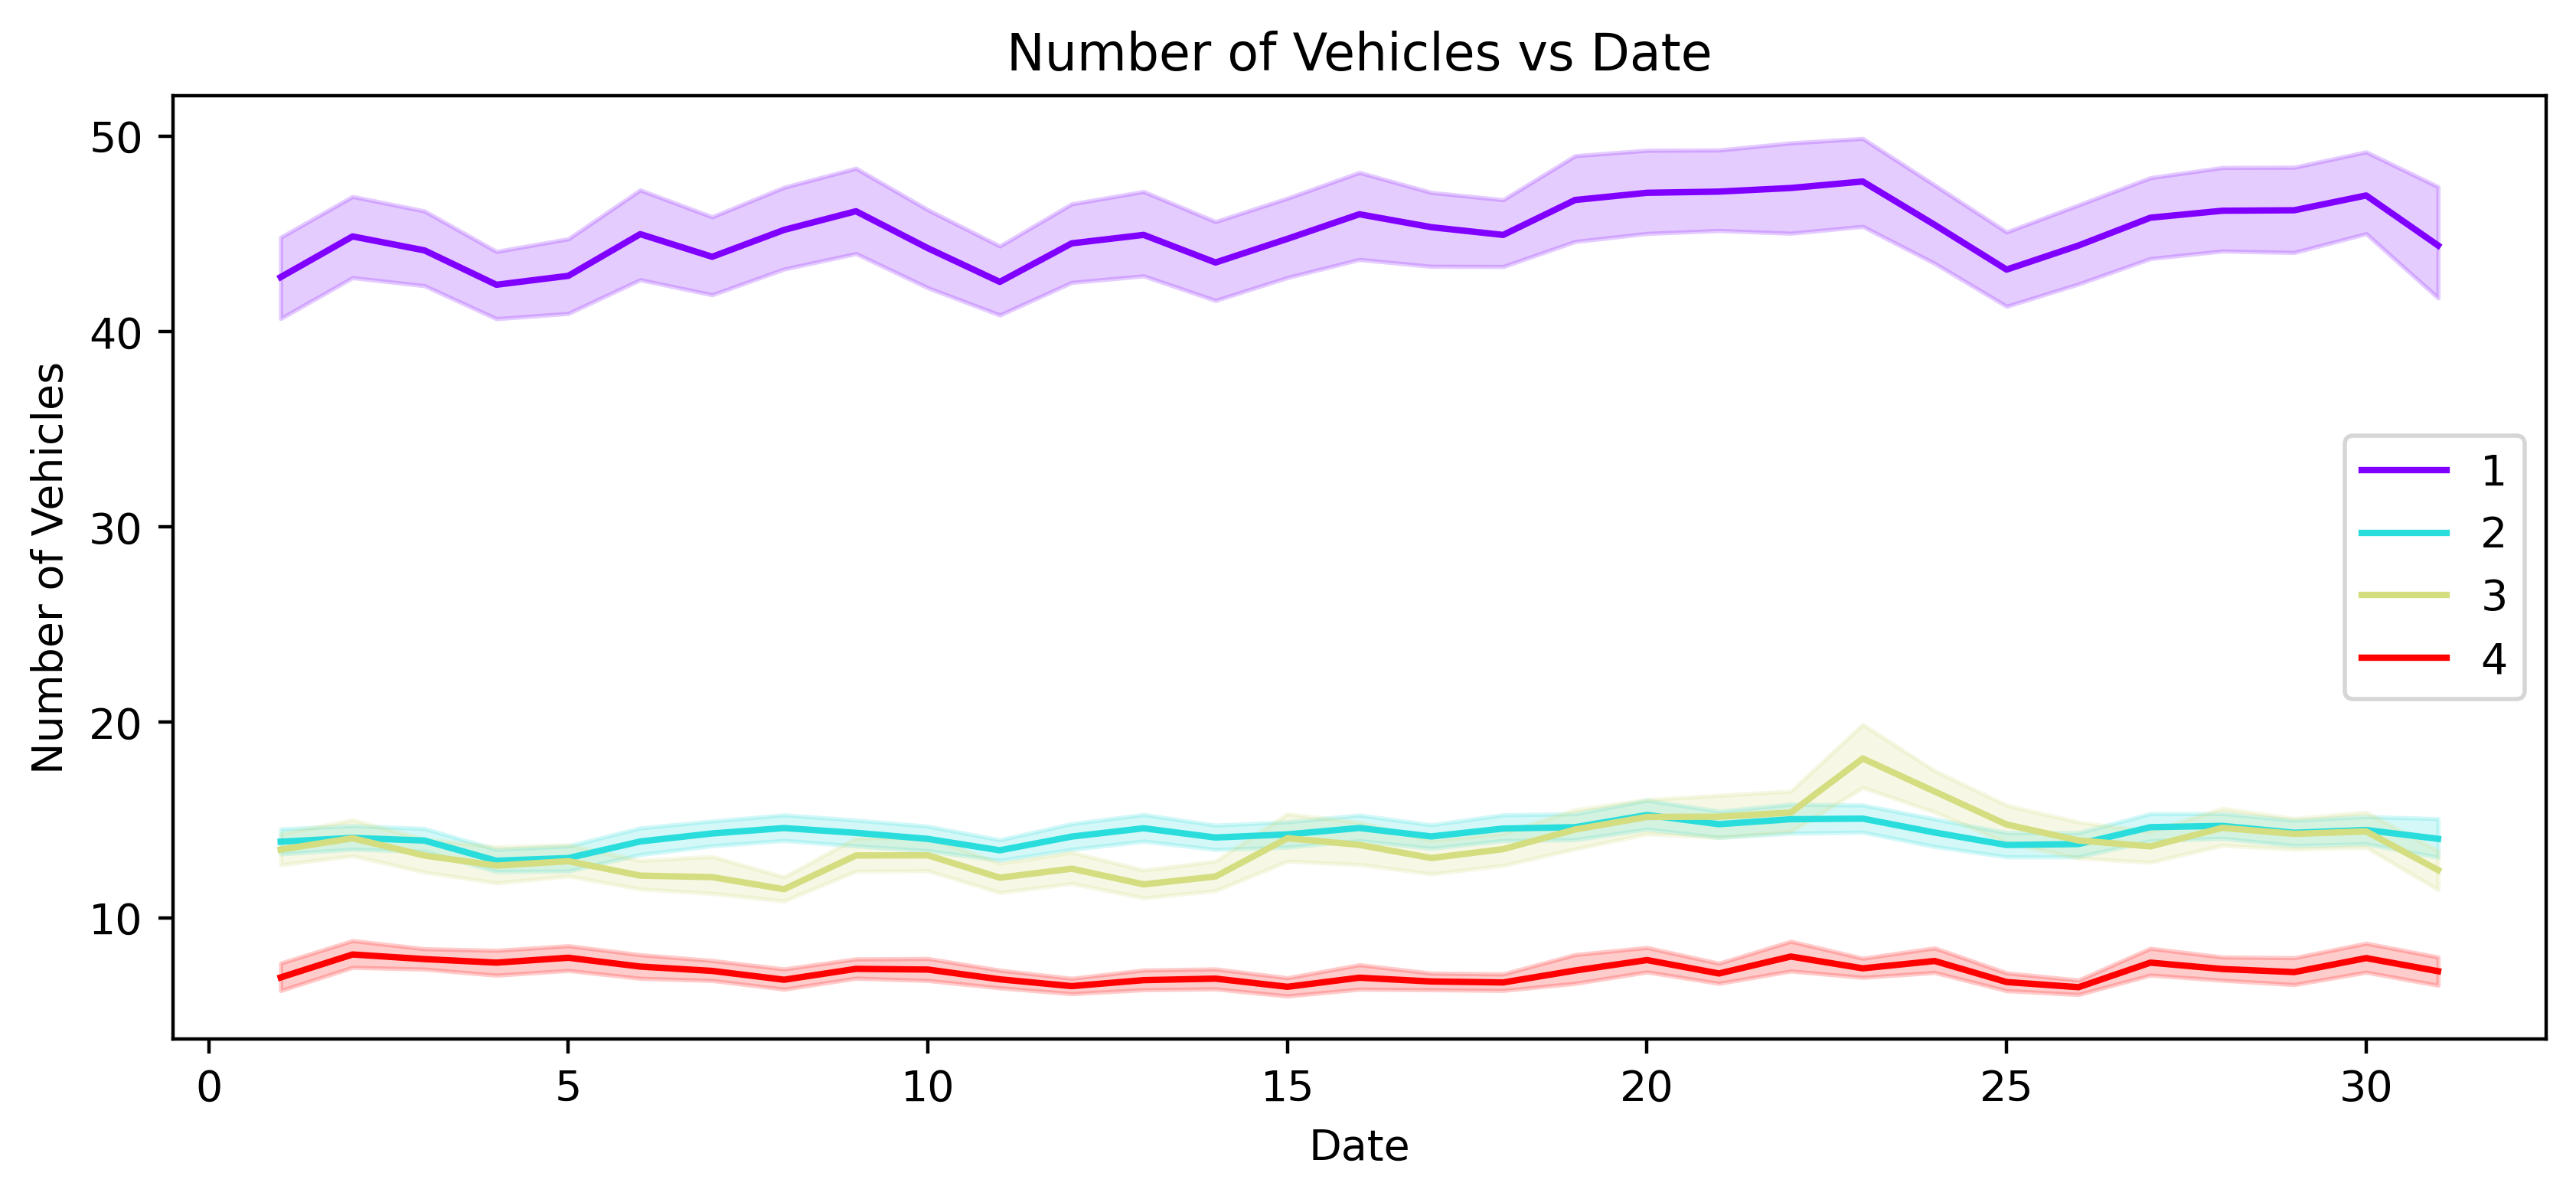

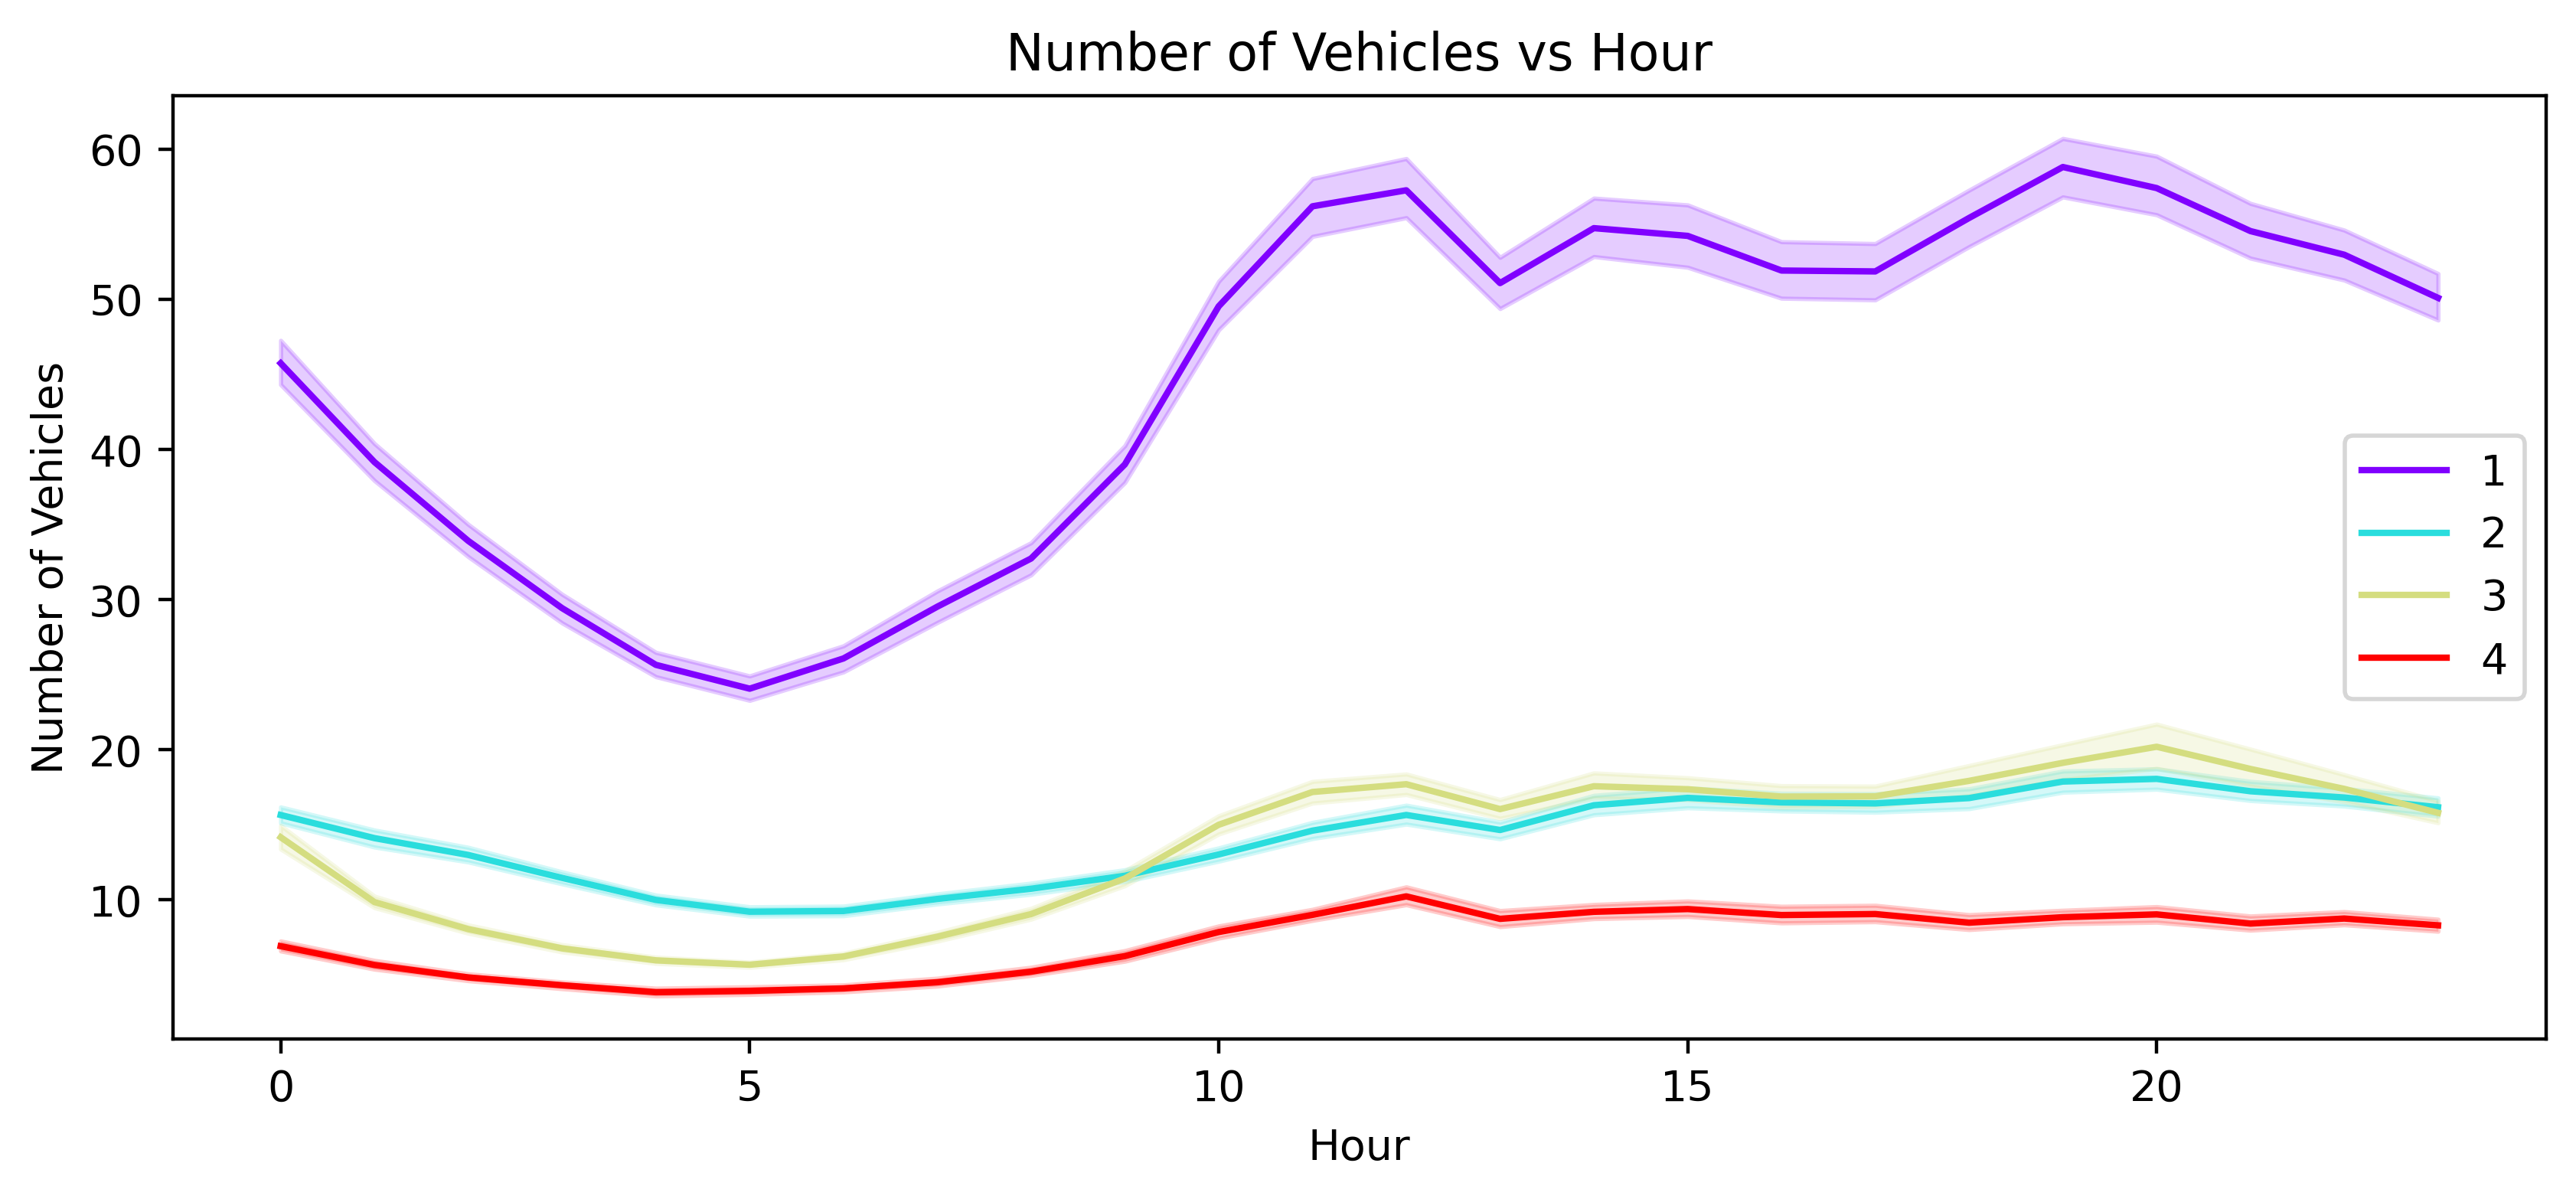

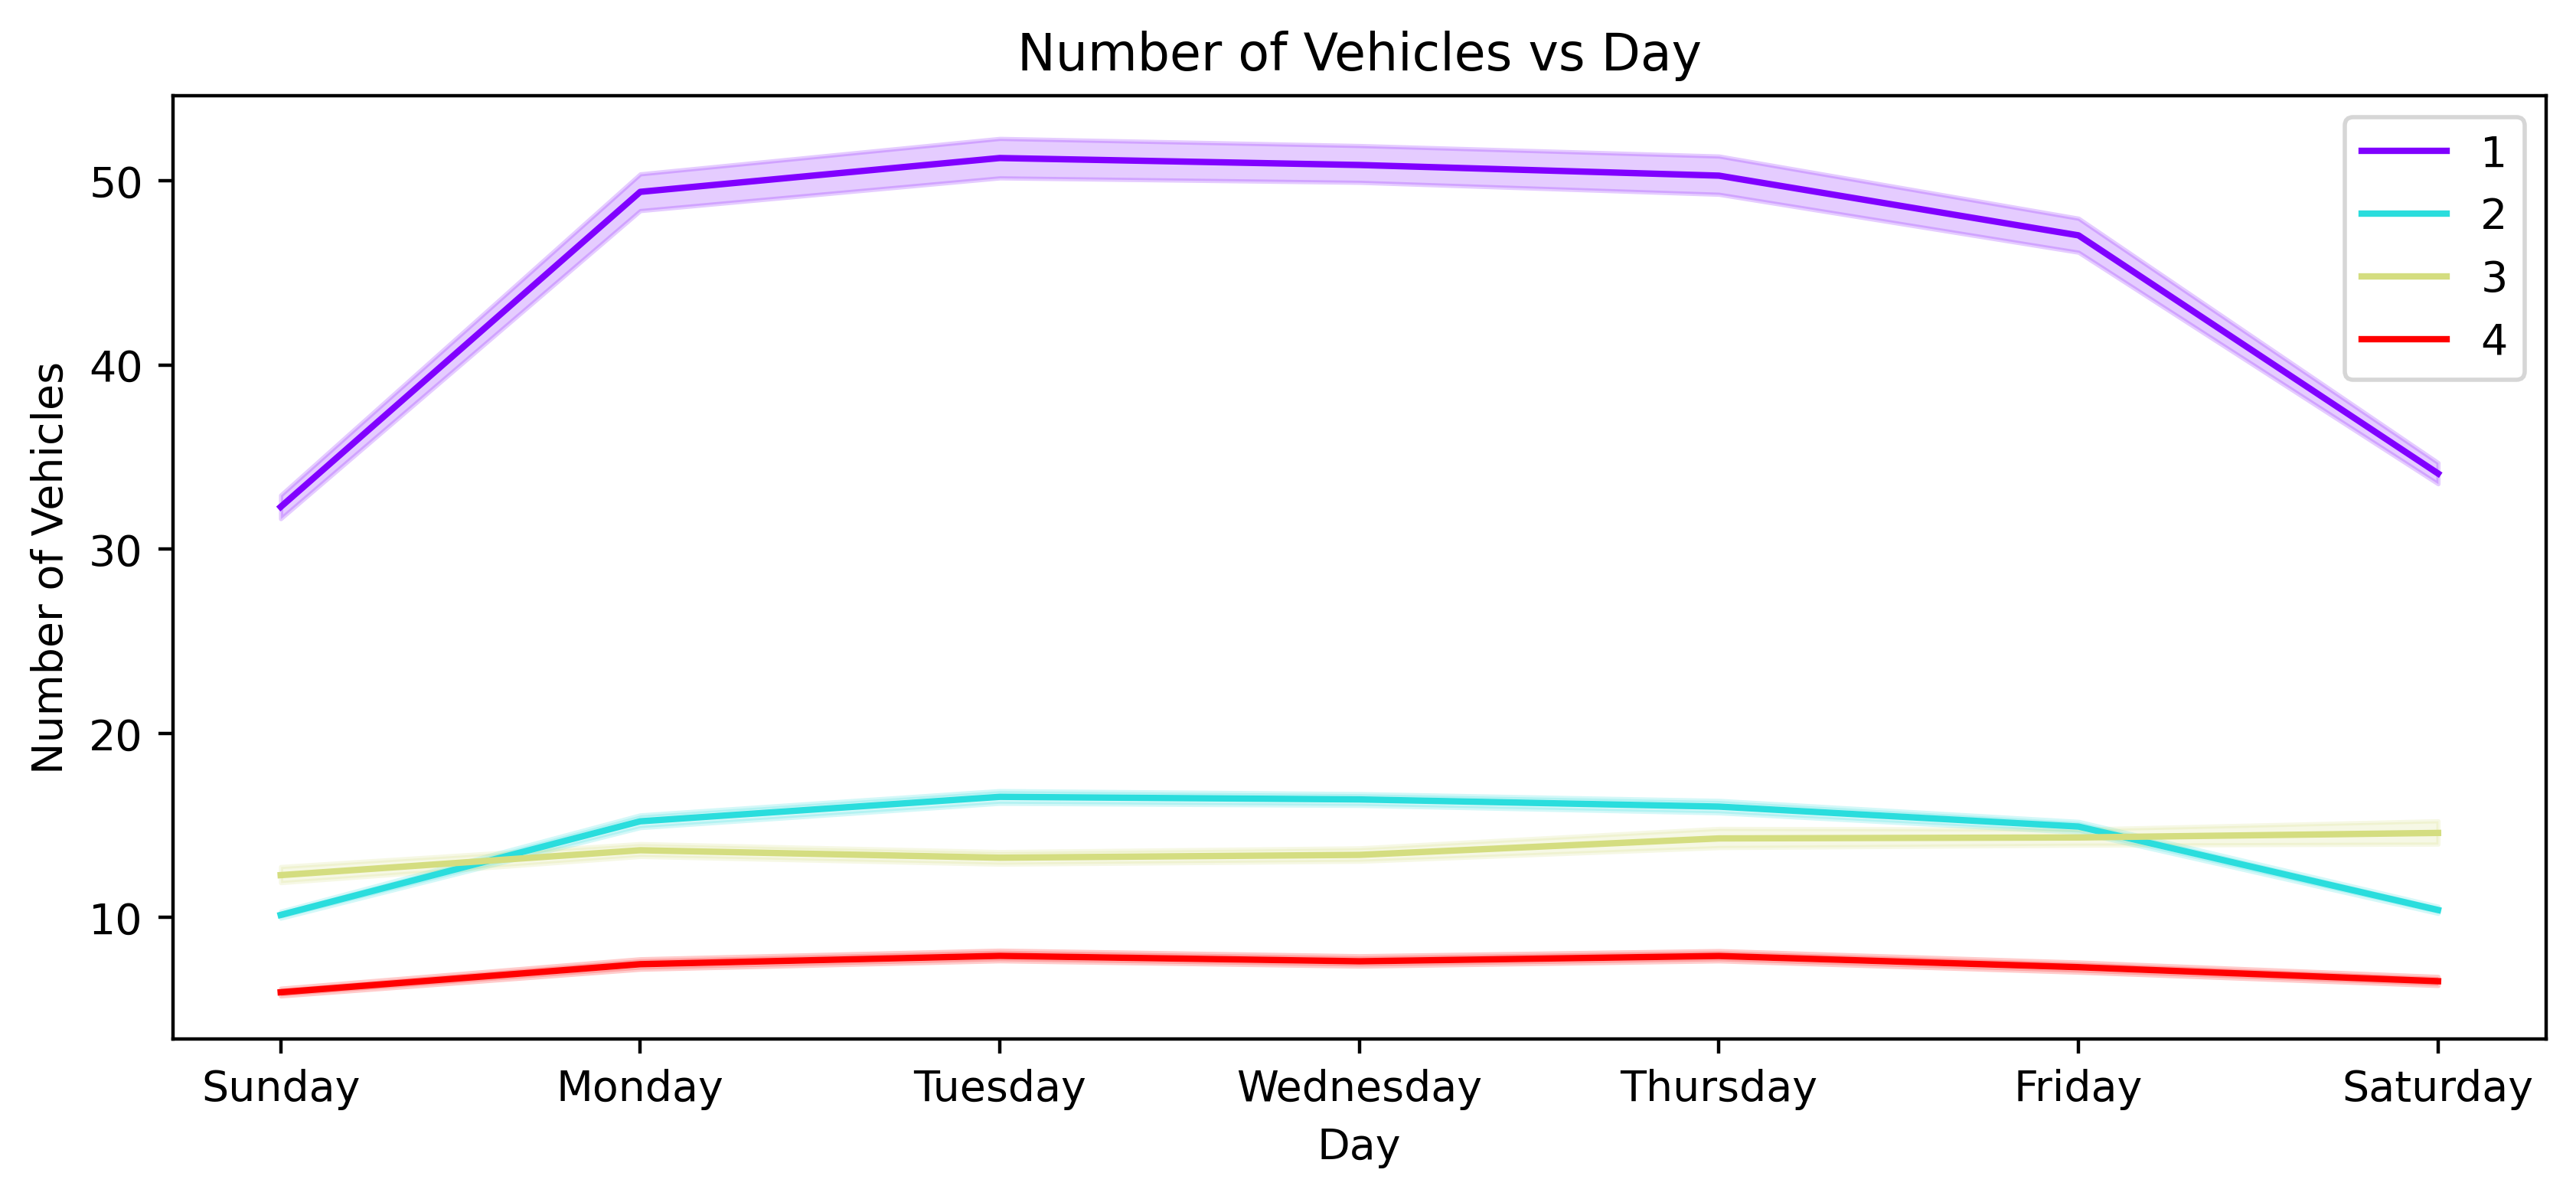

In [24]:
""" Lineplots between number of vehicles
    and Year, Month, Date, Hour, Day for each of the four junctions. """

new_features_added= ['Year', 'Month', 'Date', 'Hour', 'Day']

for feature in new_features_added: # Looping through the new features
    plt.figure(figsize=(10, 4), dpi = 400) # Setting the size of the plot
    sns.lineplot(x = df_new[feature], y = "Vehicles", data = df_new, hue="Junction", palette="rainbow") # Plotting the data
    plt.title("Number of Vehicles vs "+ str(feature)) # Setting the title of the plot
    plt.xlabel(feature) # Setting the x-axis label of the plot
    plt.ylabel('Number of Vehicles') # Setting the y-axis label of the plot
    plt.legend(loc='best') # Setting the legend location
    plt.savefig('plots/'+str(feature)+'.png') # Saving the plot
    plt.show() # Showing the plot

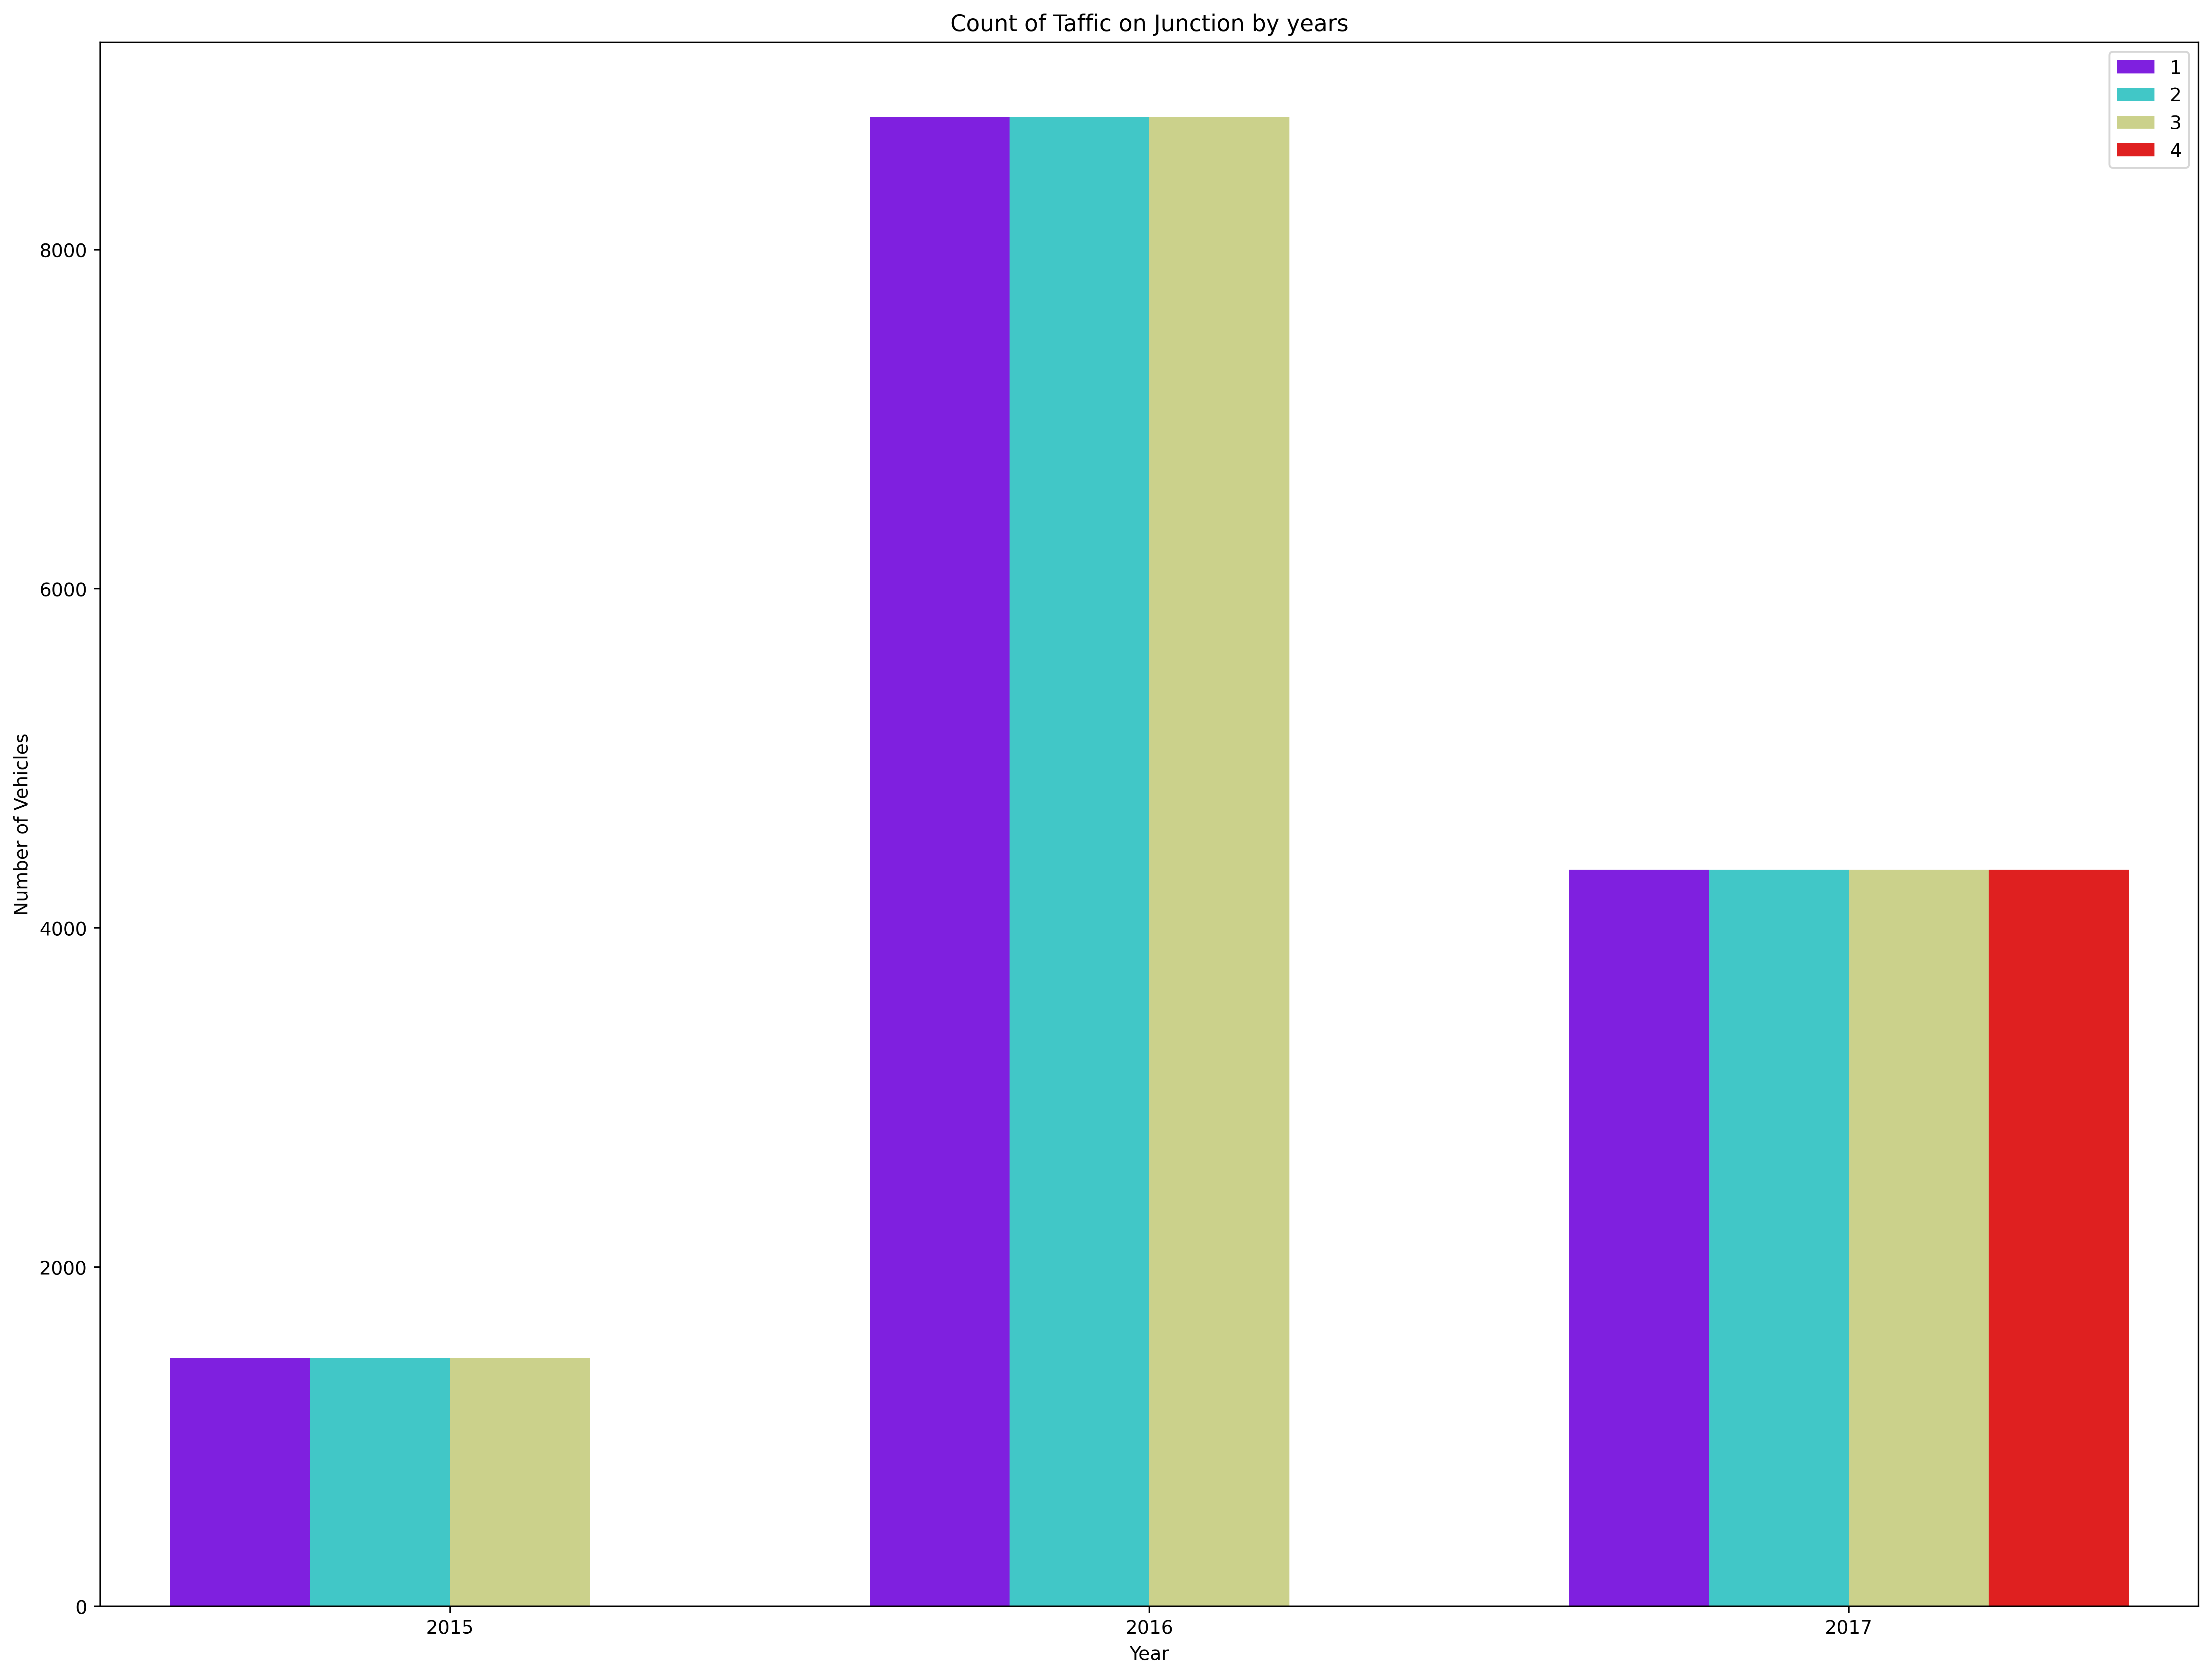

In [25]:
""" Countplot of increasing traffic over the years. """

plt.figure(figsize=(20, 15), dpi = 400)  # Setting the size of the plot
sns.countplot(x = df_new["Year"], hue="Junction", data = df_new, palette="rainbow") # Plotting the data
plt.title("Count of Taffic on Junction by years") # Setting the title of the plot
plt.xlabel("Year") # Setting the x-axis label of the plot
plt.ylabel('Number of Vehicles') # Setting the y-axis label of the plot
plt.legend(loc='best') # Setting the legend location
plt.savefig('plots/count_by_years.png') # Saving the plot
plt.show() # Showing the plot

In [26]:
for col in df_new.columns:
    if df_new[col].dtype == "object":
        print(col)

Day


<Axes: >

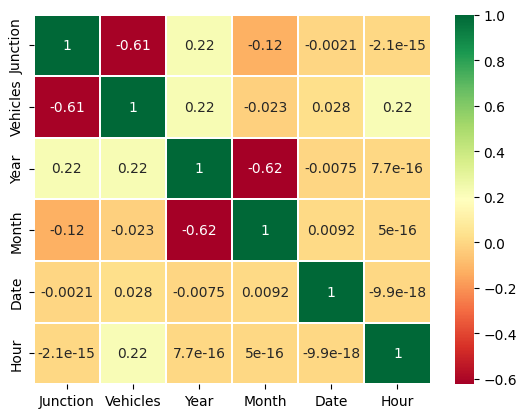

In [27]:
numeric_df = df_new.select_dtypes(include=["number"])
sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

In [28]:
""" Why is the traffic decreasing for the year 2017 ? """

values_vehs, counts_vehs = np.unique(df_new['Year'], return_counts=True)
print(values_vehs, counts_vehs)

val_2017, count_2017 = np.unique(df_new['Month'][df_new['Year'] == 2017], return_counts=True)
print("2017 Monthwise: ", val_2017, count_2017)

[2015 2016 2017] [ 4392 26352 17376]
2017 Monthwise:  [1 2 3 4 5 6] [2976 2688 2976 2880 2976 2880]


We can see that the number of vehicles in the year 2016 increased and then decreased in the year 2017 because the data consists of only 6 months of information for the year 2017.

Some Preprocessing continued after visualization.
####4.Creating four different dataframes for four different junctions.

In [29]:
""" Encoding the day of the week feature manually. """

encoded_values = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6} # Creating a dictionary for encoding

df_new['Day'] = df_new['Day'].map(encoded_values) # Encoding the day of the week
df_new # Showing the new dataframe with encoded day of the week

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0     2015-11-01 00:00:00         1        15  2015     11     1     0    6
1     2015-11-01 01:00:00         1        13  2015     11     1     1    6
2     2015-11-01 02:00:00         1        10  2015     11     1     2    6
3     2015-11-01 03:00:00         1         7  2015     11     1     3    6
4     2015-11-01 04:00:00         1         9  2015     11     1     4    6
...                   ...       ...       ...   ...    ...   ...   ...  ...
48115 2017-06-30 19:00:00         4        11  2017      6    30    19    4
48116 2017-06-30 20:00:00         4        30  2017      6    30    20    4
48117 2017-06-30 21:00:00         4        16  2017      6    30    21    4
48118 2017-06-30 22:00:00         4        22  2017      6    30    22    4
48119 2017-06-30 23:00:00         4        12  2017      6    30    23    4

[48120 rows x 8 columns]

In [30]:
""" Extracting a new DataFrame with only Junction 1 """

df_1 = df_new[df_new['Junction'] == 1] # Extracting data for Junction 1
df_1.head()  # Showing the dataframe for Junction 1

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0 2015-11-01 00:00:00         1        15  2015     11     1     0    6
1 2015-11-01 01:00:00         1        13  2015     11     1     1    6
2 2015-11-01 02:00:00         1        10  2015     11     1     2    6
3 2015-11-01 03:00:00         1         7  2015     11     1     3    6
4 2015-11-01 04:00:00         1         9  2015     11     1     4    6

In [31]:
""" Extracting a new DataFrame with only Junction 2 """

df_2 = df_new[df_new['Junction'] == 2] # Extracting data for Junction 2
df_2.reset_index(drop=True, inplace=True) # Resetting the index of the dataframe
df_2.head() # Showing the dataframe for Junction 2

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0 2015-11-01 00:00:00         2         6  2015     11     1     0    6
1 2015-11-01 01:00:00         2         6  2015     11     1     1    6
2 2015-11-01 02:00:00         2         5  2015     11     1     2    6
3 2015-11-01 03:00:00         2         6  2015     11     1     3    6
4 2015-11-01 04:00:00         2         7  2015     11     1     4    6

In [32]:
""" Extracting a new DataFrame with only Junction 3 """

df_3 = df_new[df_new['Junction'] == 3] # Extracting data for Junction 3
df_3.reset_index(drop=True, inplace=True) # Resetting the index of the dataframe
df_3.head() # Showing the dataframe for Junction 3

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0 2015-11-01 00:00:00         3         9  2015     11     1     0    6
1 2015-11-01 01:00:00         3         7  2015     11     1     1    6
2 2015-11-01 02:00:00         3         5  2015     11     1     2    6
3 2015-11-01 03:00:00         3         1  2015     11     1     3    6
4 2015-11-01 04:00:00         3         2  2015     11     1     4    6

In [33]:
""" Extracting a new DataFrame with only Junction 4 """

df_4 = df_new[df_new['Junction'] == 4] # Extracting data for Junction 4
df_4.reset_index(drop = True, inplace = True) # Resetting the index of the dataframe
df_4.head() # Showing the dataframe for Junction 4.head()

DateTime  Junction  Vehicles  Year  Month  Date  Hour  Day
0 2017-01-01 00:00:00         4         3  2017      1     1     0    6
1 2017-01-01 01:00:00         4         1  2017      1     1     1    6
2 2017-01-01 02:00:00         4         4  2017      1     1     2    6
3 2017-01-01 03:00:00         4         4  2017      1     1     3    6
4 2017-01-01 04:00:00         4         2  2017      1     1     4    6

#Junction-wise Visualization
Plotted Number of Vehicles vs DateTime for Junctions 1, 2, 3 and 4 separately along with day of the week wise distribution.

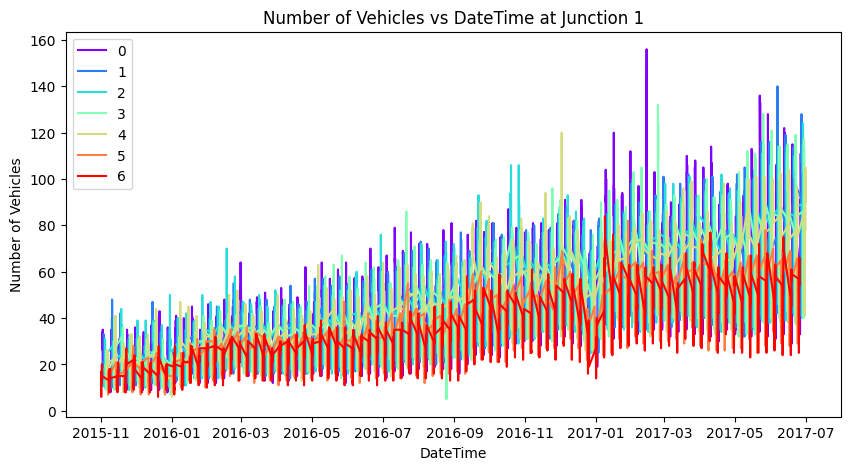

In [34]:
""" Number of Vehicles vs DateTime for Junction 1
    from starting date to the end date.
    Distribution according the day of the week is also visualized,
    where 0 is Monday and 6 is Sunday. """

plt.figure(figsize=(10, 5)) # Setting the size of the plot
sns.lineplot(x = df_1['DateTime'], y = "Vehicles", data = df_1, hue="Day", palette="rainbow") # Plotting the data
plt.title("Number of Vehicles vs DateTime at Junction 1") # Setting the title of the plot
plt.xlabel("DateTime") # Setting the x-axis label of the plot
plt.ylabel('Number of Vehicles') # Setting the y-axis label of the plot
plt.legend(loc='best') # Setting the legend location
plt.savefig('plots/junction_1.png') # Saving the plot
plt.show() # Showing the plot

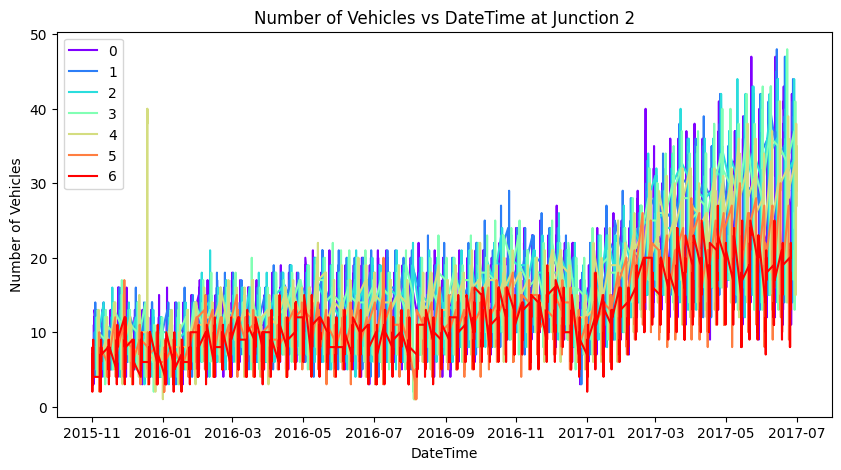

In [35]:
""" Number of Vehicles vs DateTime for Junction 2
    from starting date to the end date.
    Distribution according the day of the week is also visualized,
    where 0 is Monday and 6 is Sunday. """

plt.figure(figsize=(10, 5)) # Setting the size of the plot
sns.lineplot(x = df_2['DateTime'], y = "Vehicles", data = df_2, hue="Day", palette="rainbow") # Plotting the data
plt.title("Number of Vehicles vs DateTime at Junction 2") # Setting the title of the plot
plt.xlabel("DateTime") # Setting the x-axis label of the plot
plt.ylabel('Number of Vehicles') # Setting the y-axis label of the plot
plt.legend(loc='best') # Setting the legend location
plt.savefig('plots/junction_2.png') # Saving the plot
plt.show() # Showing the plot

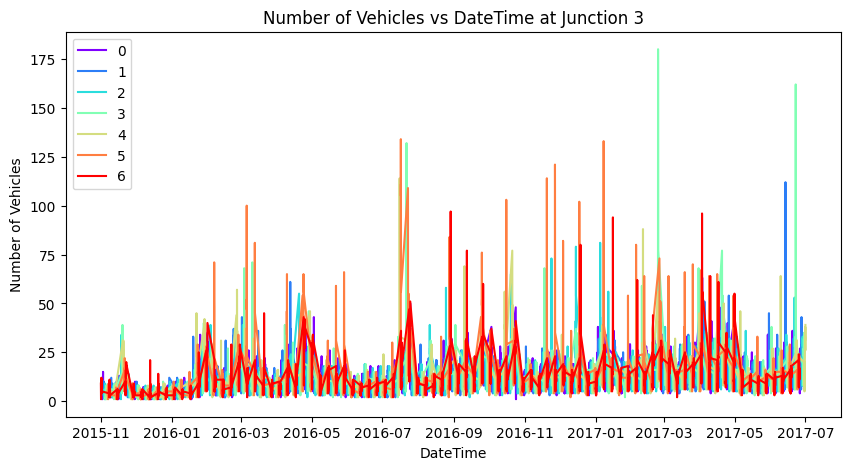

In [36]:
""" Number of Vehicles vs DateTime for Junction 3 """

plt.figure(figsize=(10, 5)) # Setting the size of the plot
sns.lineplot(x = df_3['DateTime'], y = "Vehicles", data = df_3, hue="Day", palette="rainbow") # Plotting the data
plt.title("Number of Vehicles vs DateTime at Junction 3") # Setting the title of the plot
plt.xlabel("DateTime") # Setting the x-axis label of the plot
plt.ylabel('Number of Vehicles') # Setting the y-axis label of the plot
plt.legend(loc='best') # Setting the legend location
plt.savefig('plots/junction_3.png') # Saving the plot
plt.show() # Showing the plot

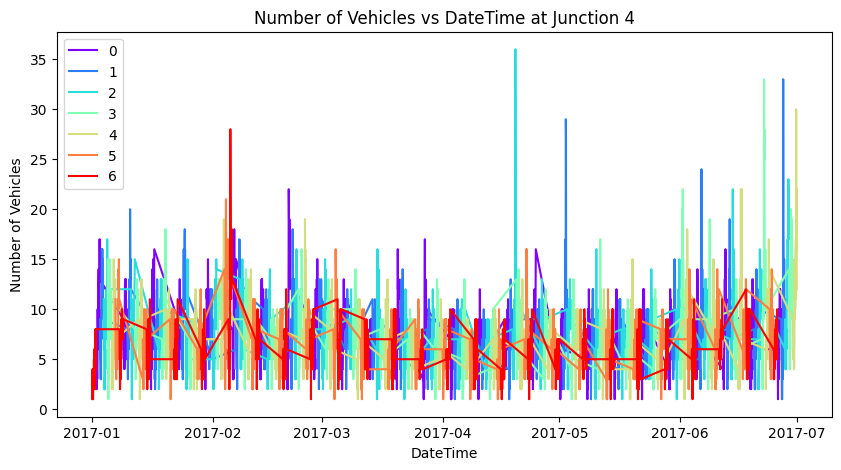

In [37]:
""" Number of Vehicles vs DateTime for Junction 4. """

plt.figure(figsize=(10, 5)) # Setting the size of the plot
sns.lineplot(x = df_4['DateTime'], y = "Vehicles", data = df_4, hue="Day", palette="rainbow") # Plotting the data
plt.title("Number of Vehicles vs DateTime at Junction 4") # Setting the title of the plot
plt.xlabel("DateTime") # Setting the x-axis label of the plot
plt.ylabel('Number of Vehicles') # Setting the y-axis label of the plot
plt.legend(loc='best') # Setting the legend location
plt.savefig('plots/junction_4.png') # Saving the plot
plt.show() # Showing the plot

#Model implementation
As our labels are continous values and not categorical data, we will use regression models to predict the number of vehicles at each hour.

Implemented multiple models using various different concepts of the course.

1.Decision Tree Regression

2.Linear Regression

3.Random Forest Regression

4.XGBoost Regression

5.Used GridSearchCV to tune the hyperparameters for the models XGBRegressor.

In [38]:
""" Importing necessary libraries from sklearn and other libraries
    such as xgboost. """

from sklearn.model_selection import train_test_split # Importing train_test_split from sklearn
from sklearn.tree import DecisionTreeRegressor # Importing DecisionTreeRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor # Importing RandomForestRegressor from sklearn
from sklearn.linear_model import LinearRegression # Importing LinearRegression from sklearn
from sklearn.metrics import mean_squared_error # Importing mean_squared_error from sklearn
import xgboost as xgb # Importing xgboost from xgboost
import lightgbm as lgb # Importing lightgbm from lightgbm
from sklearn.model_selection import GridSearchCV # Importing GridSearchCV from sklearn

Splitting the data into training and test sets for four different junctions and "Vehicles" as our labels.

In [39]:
""" Splitting the datasets into Features and Target """

X1, y1 = df_1.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_1['Vehicles']
X2, y2 = df_2.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_2['Vehicles']
X3, y3 = df_3.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_3['Vehicles']
X4, y4 = df_4.drop(['Vehicles', 'DateTime', 'Junction'], axis=1), df_4['Vehicles']

In [40]:
""" Splitting the datasets into train and test sets """

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

In [41]:
X_trains = [X1_train, X2_train, X3_train, X4_train] # Creating a list of the train sets
X_tests = [X1_test, X2_test, X3_test, X4_test] # Creating a list of the test sets
y_trains = [y1_train, y2_train, y3_train, y4_train] # Creating a list of the train targets
y_tests = [y1_test, y2_test, y3_test, y4_test] # Creating a list of the test targets

#Model Object Creation¶

In [42]:
""" Creating a list of the models along with the hyperparameter tuning for
    XGBoost using GridSearchCV using multiple hyperparameters. """

models = [DecisionTreeRegressor(max_depth=5, random_state=42,
            min_samples_leaf=5, min_samples_split=5),
            LinearRegression(),
            RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, min_samples_leaf=5, min_samples_split=5),
            GridSearchCV(RandomForestRegressor(random_state=42), param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}, cv=5),
            xgb.XGBRegressor(n_estimators=100, max_depth=5, random_state=42, framework_version=1.3),
            GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15, 20, 25]}, cv=5)]

In [43]:
""" Function for plotting the predicted values vs actual values """

def plot_prediction_vs_datetime(df, y_pred, y_test, title): # Defining the plot_prediction_vs_datetime function
    plt.figure(figsize=(10, 5)) # Setting the size of the plot
    sns.lineplot(x = [i for i in range(df.shape[0])], y = y_test, data = df, palette="rainbow", label="Actual") # Plotting the actual values
    sns.lineplot(x = [i for i in range(df.shape[0])],y= y_pred, data = df, palette="rainbow", label="Predicted") # Plotting the predicted values
    plt.title(title) # Setting the title of the plot
    plt.xlabel("DateTime") # Setting the x-axis label of the plot
    plt.ylabel('Number of Vehicles') # Setting the y-axis label of the plot
    plt.legend(loc='best') # Setting the legend location
    plt.show() # Showing the plot

In [44]:
""" Short names for the models defined"""

models_short = ["DecisionTreeRegressor", "LinearRegressor", "RandomForestRegressor", "GridSearchCV(RandomForestRegressor)", "xgb.XGBRegressor", "GridSearchCV(xgboost)"]

#Models' Training, Prediction, Plotting and Evaluation Junction-1

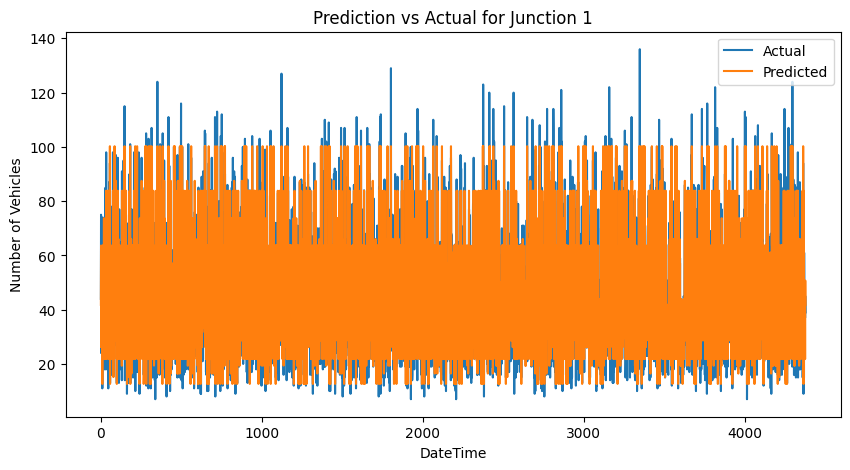

Accuracy score (Junction 1) for the model DecisionTreeRegressor on the train set: 0.8760136747446263
Accuracy score (Junction 1) for the model DecisionTreeRegressor on the test set: 0.8750423103000151
RMSE score (Junction 1) for the model DecisionTreeRegressor on the test set: 8.063584560348051


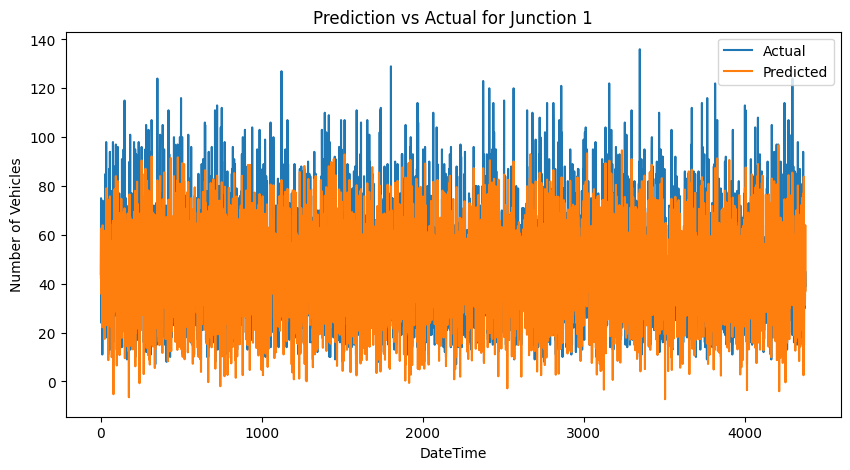

Accuracy score (Junction 1) for the model LinearRegressor on the train set: 0.7069572473028487
Accuracy score (Junction 1) for the model LinearRegressor on the test set: 0.6984381456389823
RMSE score (Junction 1) for the model LinearRegressor on the test set: 12.526647417512658


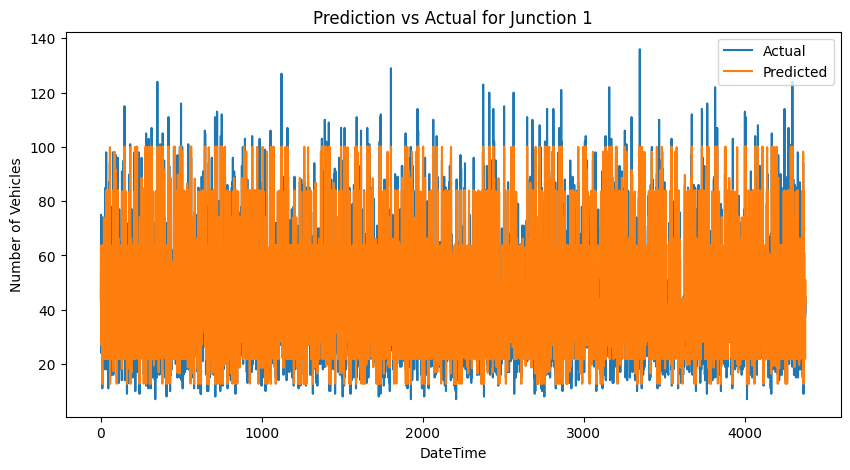

Accuracy score (Junction 1) for the model RandomForestRegressor on the train set: 0.8794272263636089
Accuracy score (Junction 1) for the model RandomForestRegressor on the test set: 0.878332160972062
RMSE score (Junction 1) for the model RandomForestRegressor on the test set: 7.95672866573454


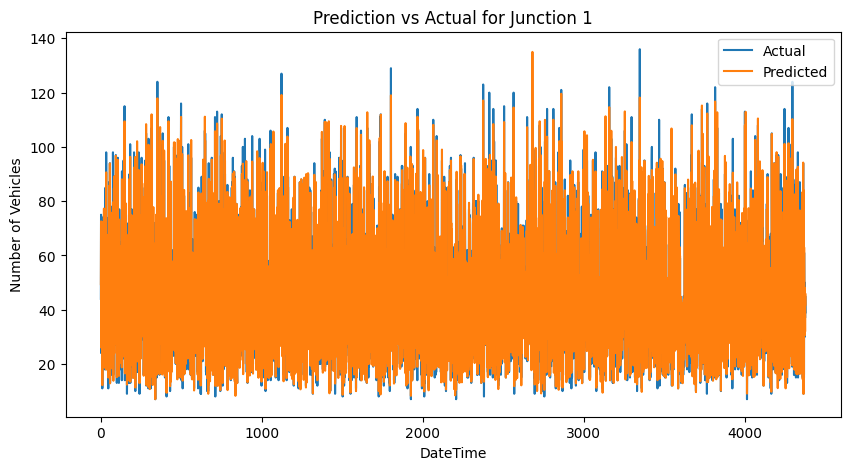

Accuracy score (Junction 1) for the model GridSearchCV(RandomForestRegressor) on the train set: 0.9955299080778052
Accuracy score (Junction 1) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.966929403212191
RMSE score (Junction 1) for the model GridSearchCV(RandomForestRegressor) on the test set: 4.148276222582357


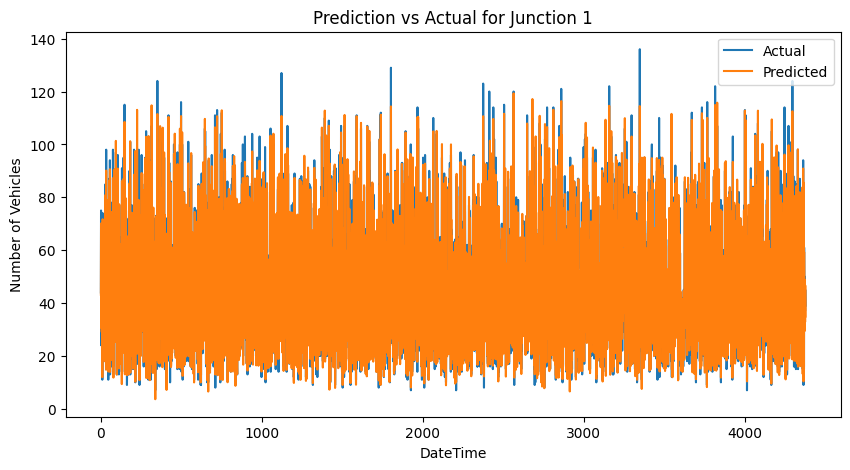

Accuracy score (Junction 1) for the model xgb.XGBRegressor on the train set: 0.9759033568158352
Accuracy score (Junction 1) for the model xgb.XGBRegressor on the test set: 0.9699169909620905
RMSE score (Junction 1) for the model xgb.XGBRegressor on the test set: 3.9564646354201396


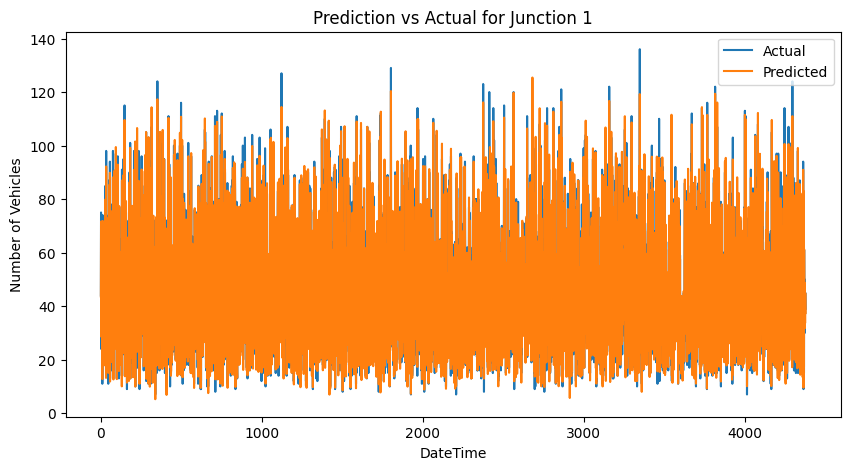

Accuracy score (Junction 1) for the model GridSearchCV(xgboost) on the train set: 0.9875094730497108
Accuracy score (Junction 1) for the model GridSearchCV(xgboost) on the test set: 0.9739679330804762
RMSE score (Junction 1) for the model GridSearchCV(xgboost) on the test set: 3.6804504660956616


In [45]:
""" Fittting, plotting and predicting the results for all the models
    for Junction 1 """

model_used_Junction_1 = [] # Creating a list for the model used for Junction 1
scores_train_Junction_1 = [] # Creating a list for the scores of the train set for Junction 1
scores_test_Junction_1 = [] # Creating a list for the scores of the test set for Junction 1
rmse_Junction_1 = [] # Creating a list for the rmse for Junction 1

for i in range(len(models)): # Looping through the models
    models[i].fit(X_trains[0], y_trains[0]) # Fitting the model to the train set
    preds_test = models[i].predict(X_tests[0]) # Predicting the test set
    preds_complete = models[i].predict(X1) # Predicting the complete set
    plot_prediction_vs_datetime(X_tests[0], preds_test, y_tests[0], 'Prediction vs Actual for Junction 1') # Plotting the prediction vs actual values
    train_score = models[i].score(X_trains[0], y_trains[0]) # Calculating the score of the train set
    test_score = models[i].score(X_tests[0], y_tests[0]) # Calculating the score of the test set
    print(f"Accuracy score (Junction 1) for the model {models_short[i]} on the train set: {train_score}") # Printing the score of the train set
    print(f"Accuracy score (Junction 1) for the model {models_short[i]} on the test set: {test_score}") # Printing the score of the test set
    print(f"RMSE score (Junction 1) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[0], preds_test)**(1/2)}") # Printing the RMSE score of the test set
    model_used_Junction_1.append(models[i]) # Appending the model used for Junction 1
    scores_train_Junction_1.append(train_score) # Appending the score of the train set for Junction 1
    scores_test_Junction_1.append(test_score) # Appending the score of the test set for Junction 1
    rmse_Junction_1.append(mean_squared_error(y_tests[0], preds_test)**0.5) # Appending the RMSE score for Junction 1

#Summarized results for Junction 1

In [46]:
print("FOR JUNCTION 1\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junction_1[i]} - Test Score: {scores_test_Junction_1[i]} - RMSE: {rmse_Junction_1[i]}\n")

FOR JUNCTION 1

DecisionTreeRegressor
   Train Score: 0.8760136747446263 - Test Score: 0.8750423103000151 - RMSE: 8.063584560348051

LinearRegressor
   Train Score: 0.7069572473028487 - Test Score: 0.6984381456389823 - RMSE: 12.526647417512658

RandomForestRegressor
   Train Score: 0.8794272263636089 - Test Score: 0.878332160972062 - RMSE: 7.95672866573454

GridSearchCV(RandomForestRegressor)
   Train Score: 0.9955299080778052 - Test Score: 0.966929403212191 - RMSE: 4.148276222582357

xgb.XGBRegressor
   Train Score: 0.9759033568158352 - Test Score: 0.9699169909620905 - RMSE: 3.9564646354201396

GridSearchCV(xgboost)
   Train Score: 0.9875094730497108 - Test Score: 0.9739679330804762 - RMSE: 3.6804504660956616



#Models' Training, Prediction, Plotting and Evaluation Junction-2¶

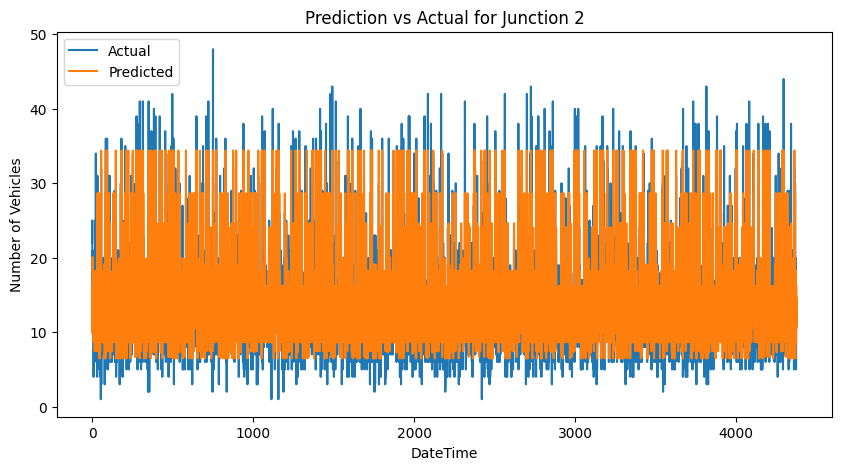

Accuracy score (Junction 2) for the model DecisionTreeRegressor on the train set: 0.8167766040732465
Accuracy score (Junction 2) for the model DecisionTreeRegressor on the test set: 0.8023516054130561
RMSE score (Junction 2) for the model DecisionTreeRegressor on the test set: 3.2429842223555956


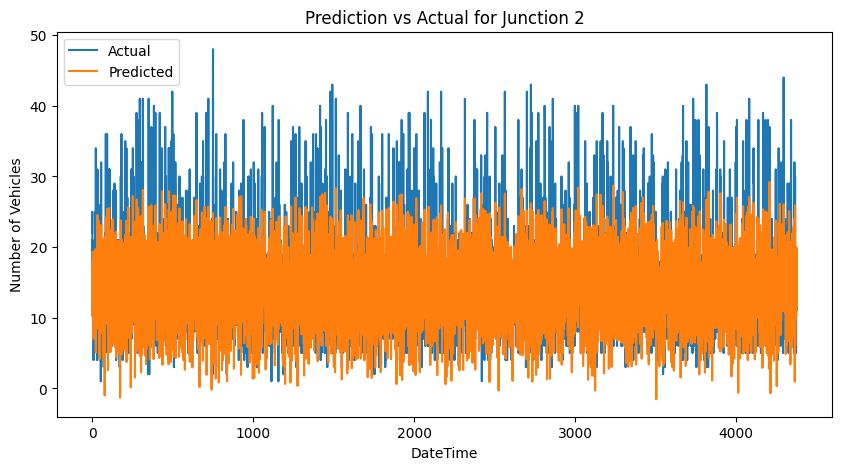

Accuracy score (Junction 2) for the model LinearRegressor on the train set: 0.6067568859214154
Accuracy score (Junction 2) for the model LinearRegressor on the test set: 0.5827797775561233
RMSE score (Junction 2) for the model LinearRegressor on the test set: 4.7117350946112095


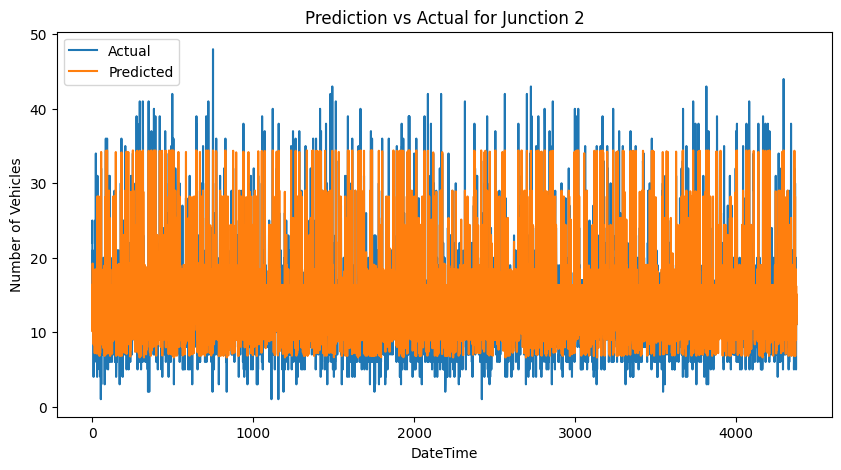

Accuracy score (Junction 2) for the model RandomForestRegressor on the train set: 0.8292168077966436
Accuracy score (Junction 2) for the model RandomForestRegressor on the test set: 0.8142337595941102
RMSE score (Junction 2) for the model RandomForestRegressor on the test set: 3.1439931135663666


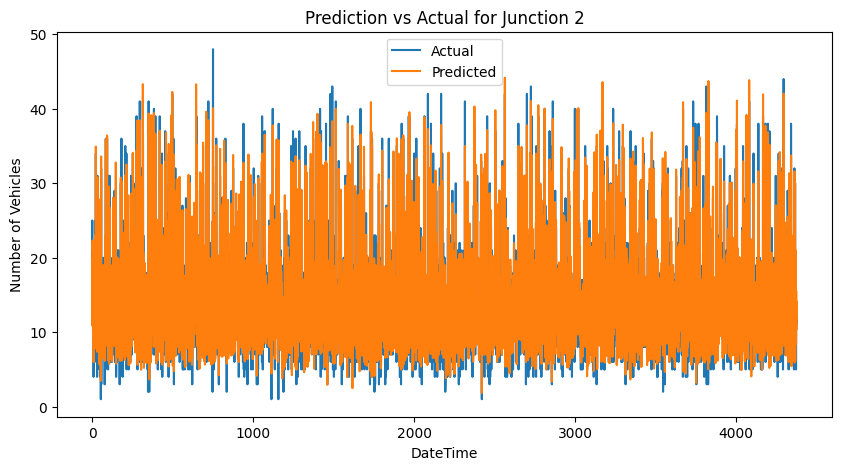

Accuracy score (Junction 2) for the model GridSearchCV(RandomForestRegressor) on the train set: 0.9765678131736985
Accuracy score (Junction 2) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.9064114300075055
RMSE score (Junction 2) for the model GridSearchCV(RandomForestRegressor) on the test set: 2.2315652807339146


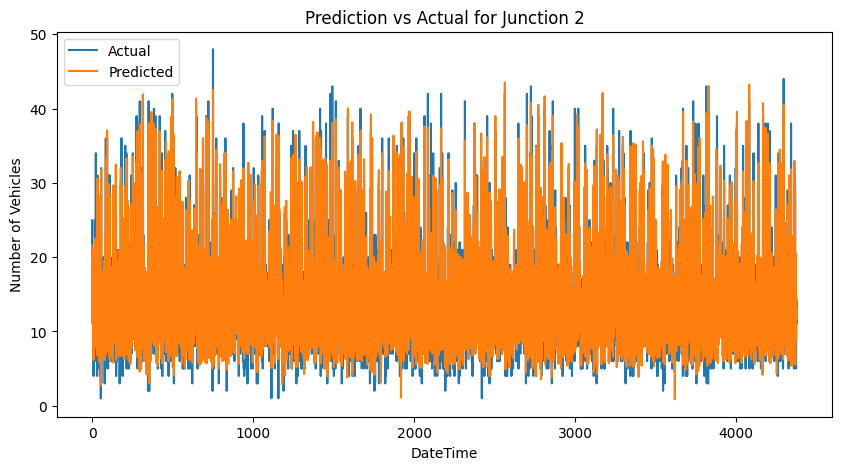

Accuracy score (Junction 2) for the model xgb.XGBRegressor on the train set: 0.9374164570709635
Accuracy score (Junction 2) for the model xgb.XGBRegressor on the test set: 0.91007498424757
RMSE score (Junction 2) for the model xgb.XGBRegressor on the test set: 2.187451594879234


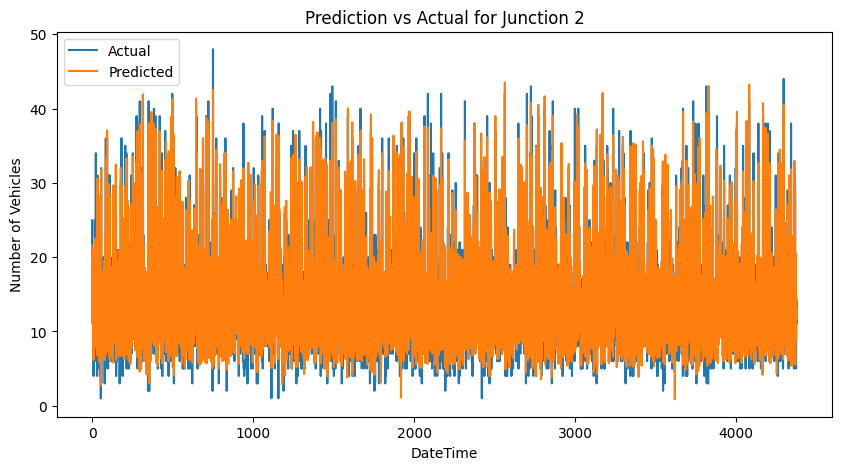

Accuracy score (Junction 2) for the model GridSearchCV(xgboost) on the train set: 0.9374164570709635
Accuracy score (Junction 2) for the model GridSearchCV(xgboost) on the test set: 0.91007498424757
RMSE score (Junction 2) for the model GridSearchCV(xgboost) on the test set: 2.187451594879234


In [47]:
""" Fittting, plotting and predicting the results for all the models
    for Junction 2 """

models_used_Junctions_2 = [] # Creating a list for the models used for Junction 2
scores_train_Junctions_2 = [] # Creating a list for the scores of the train set for Junction 2
scores_test_Junctions_2 = [] # Creating a list for the scores of the test set for Junction 2
rmse_Junctions_2 = [] # Creating a list for the rmse for Junction 2

for i in range(len(models)): # Looping through the models
    models[i].fit(X_trains[1], y_trains[1]) # Fitting the model to the train set
    preds_test = models[i].predict(X_tests[1]) # Predicting the test set
    preds_complete = models[i].predict(X2) # Predicting the complete set
    plot_prediction_vs_datetime(X_tests[1], preds_test, y_tests[1], 'Prediction vs Actual for Junction 2') # Plotting the prediction vs actual values
    train_score = models[i].score(X_trains[1], y_trains[1]) # Calculating the score of the train set
    test_score = models[i].score(X_tests[1], y_tests[1]) # Calculating the score of the test set
    print(f"Accuracy score (Junction 2) for the model {models_short[i]} on the train set: {train_score}") # Printing the score of the train set
    print(f"Accuracy score (Junction 2) for the model {models_short[i]} on the test set: {test_score}") # Printing the score of the test set
    print(f"RMSE score (Junction 2) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[1], preds_test)**(1/2)}") # Printing the RMSE score of the test set
    models_used_Junctions_2.append(models[i]) # Appending the model used for Junction 2
    scores_train_Junctions_2.append(train_score) # Appending the score of the train set for Junction 2
    scores_test_Junctions_2.append(test_score) # Appending the score of the test set for Junction 2
    rmse_Junctions_2.append(mean_squared_error(y_tests[1], preds_test)**0.5) # Appending the RMSE score for Junction 2

# Summarized results for Junction 2

In [48]:
print("FOR JUNCTION 2\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_2[i]} - Test Score: {scores_test_Junctions_2[i]} - RMSE: {rmse_Junctions_2[i]}\n")

FOR JUNCTION 2

DecisionTreeRegressor
   Train Score: 0.8167766040732465 - Test Score: 0.8023516054130561 - RMSE: 3.2429842223555956

LinearRegressor
   Train Score: 0.6067568859214154 - Test Score: 0.5827797775561233 - RMSE: 4.7117350946112095

RandomForestRegressor
   Train Score: 0.8292168077966436 - Test Score: 0.8142337595941102 - RMSE: 3.1439931135663666

GridSearchCV(RandomForestRegressor)
   Train Score: 0.9765678131736985 - Test Score: 0.9064114300075055 - RMSE: 2.2315652807339146

xgb.XGBRegressor
   Train Score: 0.9374164570709635 - Test Score: 0.91007498424757 - RMSE: 2.187451594879234

GridSearchCV(xgboost)
   Train Score: 0.9374164570709635 - Test Score: 0.91007498424757 - RMSE: 2.187451594879234



#Models' Training, Prediction, Plotting and Evaluation Junction-3


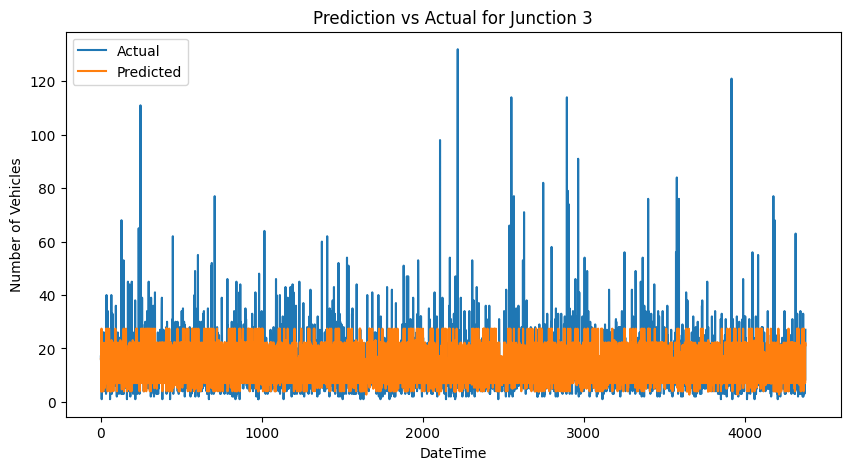

Accuracy score (Junction 3) for the model DecisionTreeRegressor on the train set: 0.38661385785904556
Accuracy score (Junction 3) for the model DecisionTreeRegressor on the test set: 0.3535319926934828
RMSE score (Junction 3) for the model DecisionTreeRegressor on the test set: 8.276766149450202


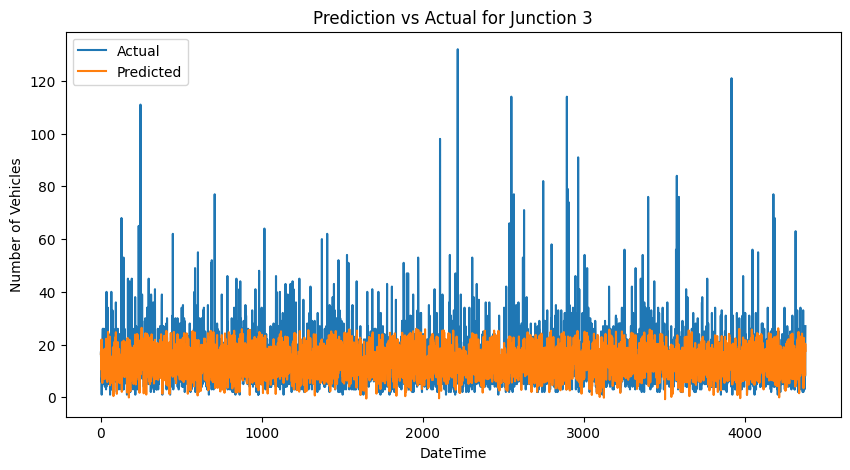

Accuracy score (Junction 3) for the model LinearRegressor on the train set: 0.24682276617398968
Accuracy score (Junction 3) for the model LinearRegressor on the test set: 0.24134769982794968
RMSE score (Junction 3) for the model LinearRegressor on the test set: 8.966202760882597


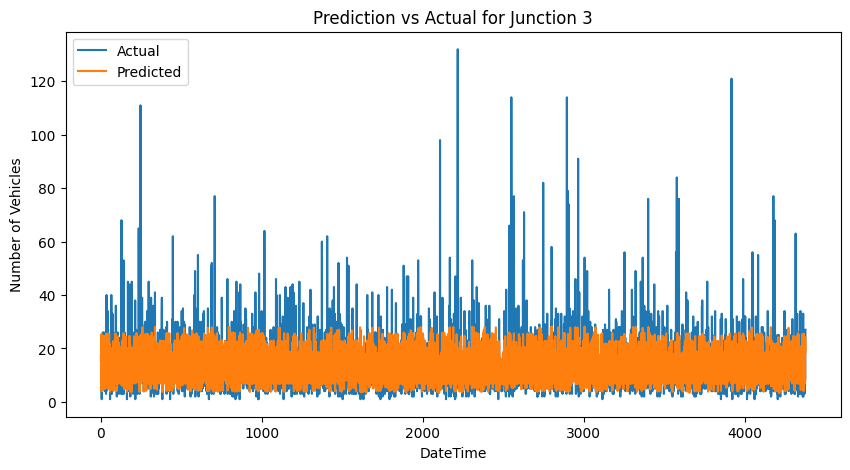

Accuracy score (Junction 3) for the model RandomForestRegressor on the train set: 0.4064305395606803
Accuracy score (Junction 3) for the model RandomForestRegressor on the test set: 0.38282086575674923
RMSE score (Junction 3) for the model RandomForestRegressor on the test set: 8.087099448332618


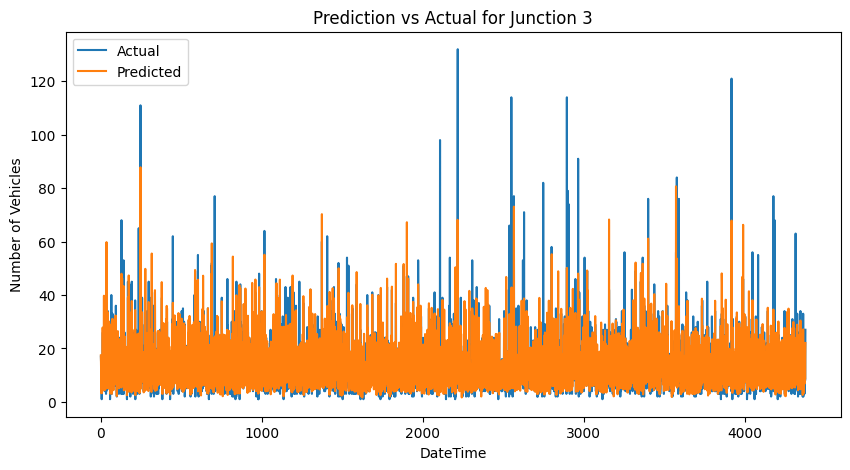

Accuracy score (Junction 3) for the model GridSearchCV(RandomForestRegressor) on the train set: 0.9660139530827855
Accuracy score (Junction 3) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.7208329606548313
RMSE score (Junction 3) for the model GridSearchCV(RandomForestRegressor) on the test set: 5.439002227312721


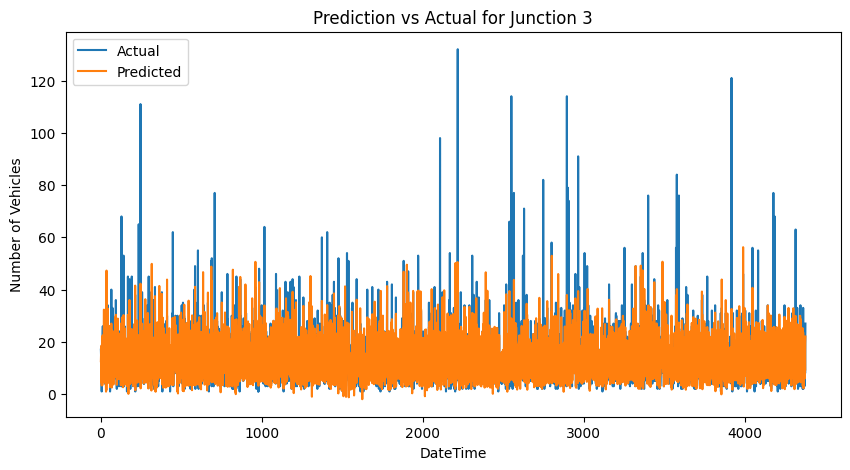

Accuracy score (Junction 3) for the model xgb.XGBRegressor on the train set: 0.7823179216560214
Accuracy score (Junction 3) for the model xgb.XGBRegressor on the test set: 0.6319077965112041
RMSE score (Junction 3) for the model xgb.XGBRegressor on the test set: 6.245475020535122


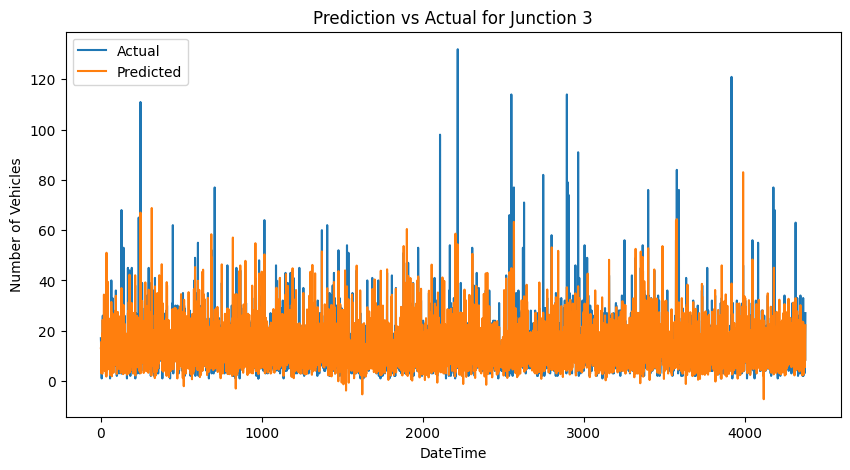

Accuracy score (Junction 3) for the model GridSearchCV(xgboost) on the train set: 0.8960244114416923
Accuracy score (Junction 3) for the model GridSearchCV(xgboost) on the test set: 0.6677722947128977
RMSE score (Junction 3) for the model GridSearchCV(xgboost) on the test set: 5.933419977721058


In [49]:
""" Fittting, plotting and predicting the results for all the models
    for Junction 3 """

models_used_Junctions_3 = [] # Creating a list for the models used for Junction 3
scores_train_Junctions_3 = [] # Creating a list for the scores of the train set for Junction 3
scores_test_Junctions_3 = [] # Creating a list for the scores of the test set for Junction 3
rmse_Junctions_3 = [] # Creating a list for the rmse for Junction 3

for i in range(len(models)): # Looping through the models
    models[i].fit(X_trains[2], y_trains[2]) # Fitting the model to the train set
    preds_test = models[i].predict(X_tests[2]) # Predicting the test set
    preds_complete = models[i].predict(X3) # Predicting the complete set
    plot_prediction_vs_datetime(X_tests[2], preds_test, y_tests[2], 'Prediction vs Actual for Junction 3') # Plotting the prediction vs actual values
    train_score = models[i].score(X_trains[2], y_trains[2]) # Calculating the score of the train set
    test_score = models[i].score(X_tests[2], y_tests[2]) # Calculating the score of the test set
    print(f"Accuracy score (Junction 3) for the model {models_short[i]} on the train set: {train_score}") # Printing the score of the train set
    print(f"Accuracy score (Junction 3) for the model {models_short[i]} on the test set: {test_score}") # Printing the score of the test set
    print(f"RMSE score (Junction 3) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[2], preds_test)**(1/2)}") # Printing the RMSE score of the test set
    models_used_Junctions_3.append(models[i]) # Appending the model used for Junction 3
    scores_train_Junctions_3.append(train_score) # Appending the score of the train set for Junction 3
    scores_test_Junctions_3.append(test_score) # Appending the score of the test set for Junction 3
    rmse_Junctions_3.append(mean_squared_error(y_tests[2], preds_test)**0.5) # Appending the RMSE score for Junction 3

#Summarized results for Junction 3

In [50]:
print("FOR JUNCTION 3\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_3[i]} - Test Score: {scores_test_Junctions_3[i]} - RMSE: {rmse_Junctions_3[i]}\n")

FOR JUNCTION 3

DecisionTreeRegressor
   Train Score: 0.38661385785904556 - Test Score: 0.3535319926934828 - RMSE: 8.276766149450202

LinearRegressor
   Train Score: 0.24682276617398968 - Test Score: 0.24134769982794968 - RMSE: 8.966202760882597

RandomForestRegressor
   Train Score: 0.4064305395606803 - Test Score: 0.38282086575674923 - RMSE: 8.087099448332618

GridSearchCV(RandomForestRegressor)
   Train Score: 0.9660139530827855 - Test Score: 0.7208329606548313 - RMSE: 5.439002227312721

xgb.XGBRegressor
   Train Score: 0.7823179216560214 - Test Score: 0.6319077965112041 - RMSE: 6.245475020535122

GridSearchCV(xgboost)
   Train Score: 0.8960244114416923 - Test Score: 0.6677722947128977 - RMSE: 5.933419977721058



# Models' Training, Prediction, Plotting and Evaluation Junction-4

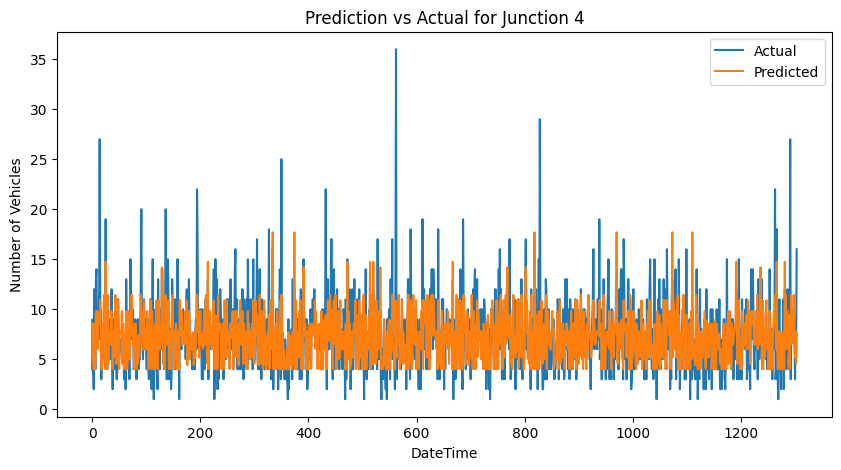

Accuracy score (Junction 4) for the model DecisionTreeRegressor on the train set: 0.5186797303401008
Accuracy score (Junction 4) for the model DecisionTreeRegressor on the test set: 0.41850534679957385
RMSE score (Junction 4) for the model DecisionTreeRegressor on the test set: 2.7904956815627573


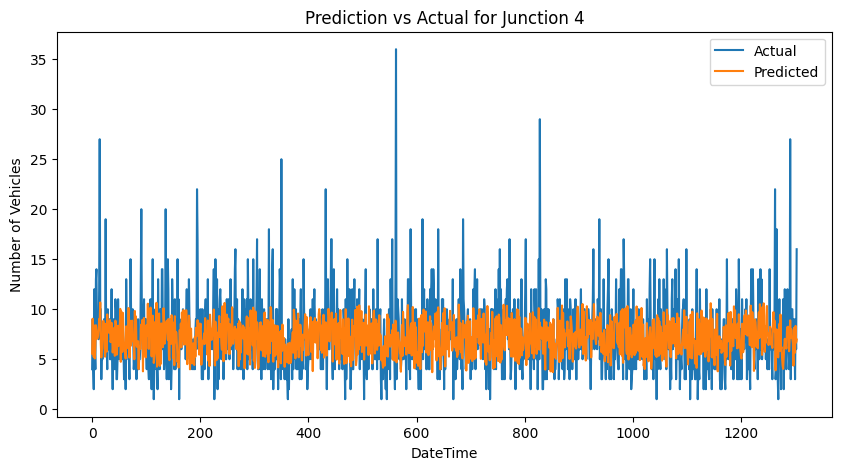

Accuracy score (Junction 4) for the model LinearRegressor on the train set: 0.22259052505139187
Accuracy score (Junction 4) for the model LinearRegressor on the test set: 0.21991673107338594
RMSE score (Junction 4) for the model LinearRegressor on the test set: 3.2320567188930602


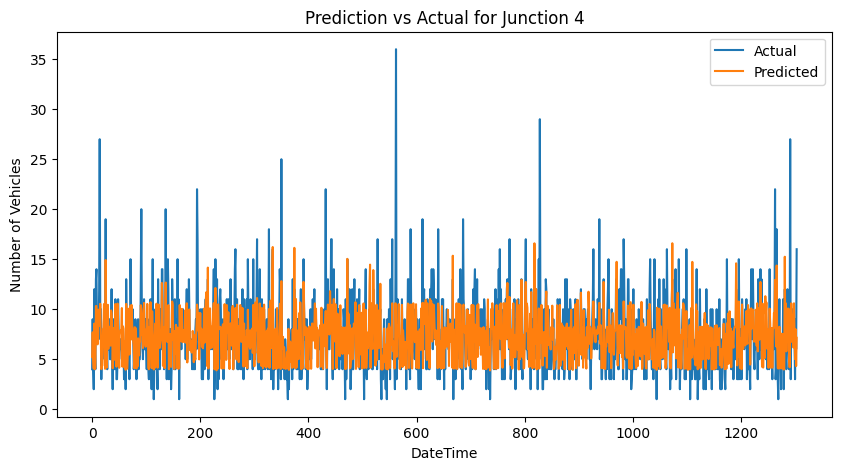

Accuracy score (Junction 4) for the model RandomForestRegressor on the train set: 0.5410231027446601
Accuracy score (Junction 4) for the model RandomForestRegressor on the test set: 0.4501981600292204
RMSE score (Junction 4) for the model RandomForestRegressor on the test set: 2.713386040299166


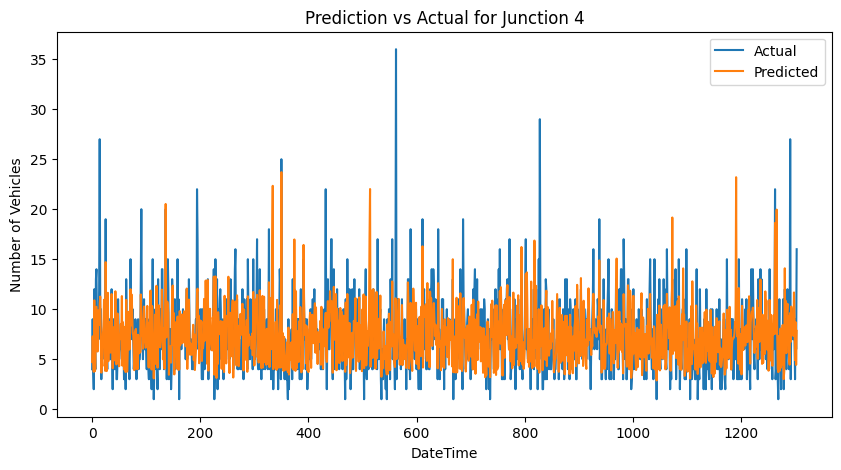

Accuracy score (Junction 4) for the model GridSearchCV(RandomForestRegressor) on the train set: 0.791750964348203
Accuracy score (Junction 4) for the model GridSearchCV(RandomForestRegressor) on the test set: 0.48804168631942935
RMSE score (Junction 4) for the model GridSearchCV(RandomForestRegressor) on the test set: 2.6183385011011002


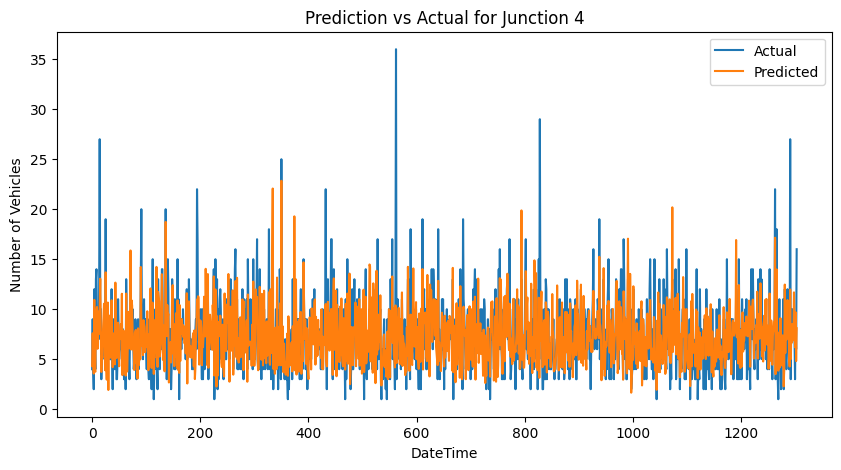

Accuracy score (Junction 4) for the model xgb.XGBRegressor on the train set: 0.7995110716799355
Accuracy score (Junction 4) for the model xgb.XGBRegressor on the test set: 0.4885573943095527
RMSE score (Junction 4) for the model xgb.XGBRegressor on the test set: 2.6170194109836733


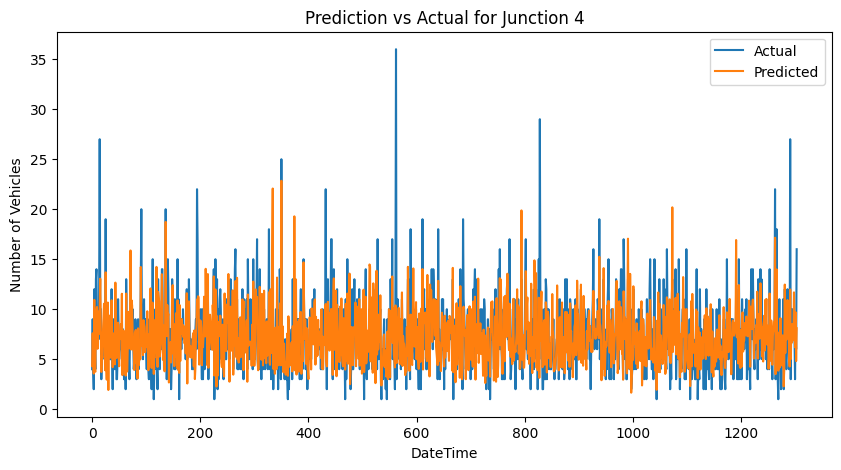

Accuracy score (Junction 4) for the model GridSearchCV(xgboost) on the train set: 0.7995110716799355
Accuracy score (Junction 4) for the model GridSearchCV(xgboost) on the test set: 0.4885573943095527
RMSE score (Junction 4) for the model GridSearchCV(xgboost) on the test set: 2.6170194109836733


In [51]:
""" Fitting, plotting and predicting the results for all the models
    for Junction 4 """

models_used_Junctions_4 = [] # Creating a list for the models used for Junction 4
scores_train_Junctions_4 = [] # Creating a list for the scores of the train set for Junction 4
scores_test_Junctions_4 = [] # Creating a list for the scores of the test set for Junction 4
rmse_Junctions_4 = [] # Creating a list for the rmse for Junction 4

for i in range(len(models)): # Looping through the models
    models[i].fit(X_trains[3], y_trains[3]) # Fitting the model to the train set
    preds_test = models[i].predict(X_tests[3]) # Predicting the test set
    preds_complete = models[i].predict(X4) # Predicting the complete set
    plot_prediction_vs_datetime(X_tests[3], preds_test, y_tests[3], 'Prediction vs Actual for Junction 4') # Plotting the prediction vs actual values
    train_score = models[i].score(X_trains[3], y_trains[3]) # Calculating the score of the train set
    test_score = models[i].score(X_tests[3], y_tests[3]) # Calculating the score of the test set
    print(f"Accuracy score (Junction 4) for the model {models_short[i]} on the train set: {train_score}") # Printing the score of the train set
    print(f"Accuracy score (Junction 4) for the model {models_short[i]} on the test set: {test_score}") # Printing the score of the test set
    print(f"RMSE score (Junction 4) for the model {models_short[i]} on the test set: {mean_squared_error(y_tests[3], preds_test)**(1/2)}") # Printing the RMSE score of the test set
    models_used_Junctions_4.append(models[i]) # Appending the model used for Junction 4
    scores_train_Junctions_4.append(train_score) # Appending the score of the train set for Junction 4
    scores_test_Junctions_4.append(test_score) # Appending the score of the test set for Junction 4
    rmse_Junctions_4.append(mean_squared_error(y_tests[3], preds_test)**0.5) # Appending the RMSE score for Junction 4

# Summarized results for Junction 4

In [52]:
print("FOR JUNCTION 4\n")
for i in range(len(models_short)):
    print(f"{models_short[i]}\n   Train Score: {scores_train_Junctions_4[i]} - Test Score: {scores_test_Junctions_4[i]} - RMSE: {rmse_Junctions_4[i]}\n")

FOR JUNCTION 4

DecisionTreeRegressor
   Train Score: 0.5186797303401008 - Test Score: 0.41850534679957385 - RMSE: 2.7904956815627573

LinearRegressor
   Train Score: 0.22259052505139187 - Test Score: 0.21991673107338594 - RMSE: 3.2320567188930602

RandomForestRegressor
   Train Score: 0.5410231027446601 - Test Score: 0.4501981600292204 - RMSE: 2.713386040299166

GridSearchCV(RandomForestRegressor)
   Train Score: 0.791750964348203 - Test Score: 0.48804168631942935 - RMSE: 2.6183385011011002

xgb.XGBRegressor
   Train Score: 0.7995110716799355 - Test Score: 0.4885573943095527 - RMSE: 2.6170194109836733

GridSearchCV(xgboost)
   Train Score: 0.7995110716799355 - Test Score: 0.4885573943095527 - RMSE: 2.6170194109836733



#Best Models obtained for each of the four junctions

In [57]:
final_models = {"Junction 1": models[5], "Junction 2": models[5], "Junction 3": models[5], "Junction 4": models[5]}

In [58]:
final_model_1 = final_models["Junction 1"]
final_model_2 = final_models["Junction 2"]
final_model_3 = final_models["Junction 3"]
final_model_4 = final_models["Junction 4"]

#Fitting the best models obtained.

In [59]:
final_model_1.fit(X_trains[0], y_trains[0]) # For Junction 1

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [60]:
final_model_2.fit(X_trains[1], y_trains[1]) # For Junction 2

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [61]:
final_model_3.fit(X_trains[2], y_trains[2]) # For Junction 3

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [62]:
final_model_4.fit(X_trains[3], y_trains[3]) # For Junction 4

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [100, 200, 300, 400, 500]})

#Implementing the end-to-end pipeline using the pickle library for saving the models.

In [63]:
import pickle # Importing the pickle library

In [64]:
data1 = {"model" : final_model_1, "le_day" : encoded_values} # Creating a dictionary for the Junction 1's best model and the label encoder
data2 = {"model" : final_model_2, "le_day" : encoded_values} # Creating a dictionary for the Junction 2's best model and the label encoder
data3 = {"model" : final_model_3, "le_day" : encoded_values} # Creating a dictionary for the Junction 3's best model and the label encoder
data4 = {"model" : final_model_4, "le_day" : encoded_values} # Creating a dictionary for the Junction 4's best model and the label encoder

In [66]:
with open('final_model_1.pkl', 'wb') as f1: # Opening the file for writing
    pickle.dump(data1, f1) # Writing the dictionary to the file and saving the model for Junction 1

with open('final_model_2.pkl', 'wb') as f2: # Opening the file for writing
    pickle.dump(data2, f2) # Writing the dictionary to the file and saving the model for Junction 2

with open('final_model_3.pkl', 'wb') as f3: # Opening the file for writing
    pickle.dump(data3, f3) # Writing the dictionary to the file and saving the model for Junction 3

with open('final_model_4.pkl', 'wb') as f4: # Opening the file for writing
    pickle.dump(data4, f4) # Writing the dictionary to the file and saving the model for Junction 4